# Video Games Analysis
by Mercy Faith Nyambura Kariuki

# Introduction
A task:
For an online store of computer games, it is necessary to analyze the market, identify patterns that determine the success of games, determine the user profile for each of the regions, and test working hypotheses. This will allow you to place a bet on a potentially popular product and plan advertising campaigns to help develop the store's business.

The data is collected from open sources and recorded in the games.csv file. The data includes information from 1983 to 2016. Data for 2016 may not be complete

Games.csv data description:

- Name - the name of the game
- Platform - platform
- Year - year of release
- Genre - game genre
- NA_sales - Sales in North America (millions of dollars)
- EU_sales - sales in Europe (millions of dollars)
- JP_sales - sales in Japan (millions of dollars)
- Other_sales - sales in other countries (millions of dollars)
- Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Stages of the project

<li><a href="#DataAquisition">1. Data Aquisition</a></li>
<li><a href="#DataPreprocessing">2. Data Preprocessing</a></li>
<li><a href="#3. ExploratoryDataAnalysis">3. ExploratoryDataAnalysis</a></li>
<li><a href="#PortraitOfTheUserOfEachRegion">4. Portrait of the user of each region</a></li>
<!-- <li><a href="#ResearchOfStatisticalIndicators">5. Research of statistical indicators</a></li> 
<li><a href="HypothesisTesting">5. Hypothesis Testing</a></li> -->
<li><a href="ResearchResults">5. Research Results</a></li>

# Stage 1. Data acquisition
> **Let's examine the data provided for the project.**

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats


%matplotlib inline

Let's read the games.csv file and store it in the sales variable.

In [3]:
sales=pd.read_csv('C:/Users/kariu/OneDrive/Desktop/Data Science/Video Games Sales/vgsales.csv')

> Getting the first 10 rows of a table.

In [4]:
sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
# getting general information about the data in the df table
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


> **Let's take a closer look at the information received.**

There are 11 columns in the table. There are two data types: non-null object (4 columns) and non-null float64 (6 columns).

Let's analyze in detail which columns are in sales and what information they contain:

- Rank - ranking of overall sales, integer
- Name - the name of the game
- Platform -  Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game, object
- NA_sales - Sales in North America (millions)
- EU_sales - sales in Europe (millions of dollars)
- JP_sales - sales in Japan (millions of dollars)
- Other_sales - sales in other countries (millions of dollars)
- Global_Sales - Total worldwide sales (millions of dollars)
 
The number of values ​​in the columns varies. This indicates that there are missing values ​​in the data.


Each row of the table contains historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation), release year, and assigned age rating.


The columns Genre, Platform, Year and the breakdown of sales by region are particularly valuable for testing working hypotheses. Using them, we will be able to track how user preferences have changed over time, to compile a portrait of a user in each region. 

# Stage 2. Data preprocessing


> **We will convert the data to the required types, process the gaps (with filling where possible), check the data for duplicates, and also calculate the total sales in all regions and write them in a separate column.**

In [6]:
sales.duplicated().sum()

0

In [7]:
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
sales.shape

(16598, 11)

We don't have release year data for 269 games.
Note that some of the lines in the title of the game have a release year. It can be used as a replacement for missing data for the year column


Let's search for such strings and create a dictionary, where the key will be the index of the string in which the release year is present in the game title itself, and the release year itself will be the value.

In [9]:
idx_year = {} # create an empty dictionary

# iterate over rows with missing year information
for row in sales[sales['Year'].isna()].itertuples():
    for item in row.Name.split(' '):  # split the game name into separate words
        if item == row.Name.split(' ')[-1]:  # take the last word from the list
            try:  # take the last word from the list
                if len(item) == 2 or len(item) == 4: # check its "length"
                    item = int(item)  # convert data type
                    if item < 21:  # bring the years of this century to the full date
                        item += 2000
                    elif item > 80 and item < 100: # bring the years of the last century to the full date
                        item += 1900
                    if item >= 1980:  # 1980 is the minimum year in our data
                        idx_year[row.Index] = item
            except: # if the last word is not a number then we continue to iterate over the lines
                continue
                
# check the output of the resulting dictionary
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 179   | year: 2004
index: 377   | year: 2004
index: 470   | year: 2006
index: 1303  | year: 1999
index: 1649  | year: 2003
index: 2484  | year: 2007
index: 2776  | year: 2011
index: 3421  | year: 2006
index: 3501  | year: 2002
index: 4199  | year: 2007
index: 4797  | year: 2003
index: 5162  | year: 2003
index: 5669  | year: 2005
index: 5901  | year: 2003
index: 8929  | year: 2005
index: 12922 | year: 2011
index: 13870 | year: 2006
index: 15739 | year: 2007
index: 15865 | year: 2008
index: 16057 | year: 2008


> We replace the missing values with those obtained from the names of the games of the year.

In [10]:
# iterate over the dictionary and replace
for key, v in idx_year.items():
    sales.loc[key, 'Year'] = v

> Let's check the data for the replacements made in the previous step.

In [11]:
# select rows with missing data in the year_of_release column
sales[sales['Year'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.0,0.22,2.39
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


> **Now we don't have data on the release year of 251 games. This is less than after the previous check, which means the replacements were completed successfully.**


> **It is possible to find the release years of games for the remaining 251 rows using the parsing of pages on the Internet, but at this stage we consider it possible to simply get rid of these rows and continue working with the existing dataset. because 251 rows is only about 1.49% of the total amount of data, which should not significantly affect the results of the study. If at some stage we realize that we will not have enough data, then we will return to the issue of parsing pages on the Internet to find the missing information.**

In [12]:
# delete rows with missing data in the year_of_release column
# reset indexes
sales = sales.dropna(subset=['Year']).reset_index(drop=True)

In [13]:
sales.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       38
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16347 entries, 0 to 16346
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16347 non-null  int64  
 1   Name          16347 non-null  object 
 2   Platform      16347 non-null  object 
 3   Year          16347 non-null  float64
 4   Genre         16347 non-null  object 
 5   Publisher     16309 non-null  object 
 6   NA_Sales      16347 non-null  float64
 7   EU_Sales      16347 non-null  float64
 8   JP_Sales      16347 non-null  float64
 9   Other_Sales   16347 non-null  float64
 10  Global_Sales  16347 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
sales['Year'] = sales.Year.astype('int64')

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16347 entries, 0 to 16346
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16347 non-null  int64  
 1   Name          16347 non-null  object 
 2   Platform      16347 non-null  object 
 3   Year          16347 non-null  int64  
 4   Genre         16347 non-null  object 
 5   Publisher     16309 non-null  object 
 6   NA_Sales      16347 non-null  float64
 7   EU_Sales      16347 non-null  float64
 8   JP_Sales      16347 non-null  float64
 9   Other_Sales   16347 non-null  float64
 10  Global_Sales  16347 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [17]:
sales.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.179039,-0.400680,-0.379181,-0.268767,-0.332939,-0.427179
Year,0.179039,1.000000,-0.091518,0.005796,-0.169233,0.040827,-0.074879
NA_Sales,-0.400680,-0.091518,1.000000,0.768091,0.450766,0.634846,0.941154
EU_Sales,-0.379181,0.005796,0.768091,1.000000,0.436046,0.726198,0.902946
JP_Sales,-0.268767,-0.169233,0.450766,0.436046,1.000000,0.290365,0.612402
Other_Sales,-0.332939,0.040827,0.634846,0.726198,0.290365,1.000000,0.748244
Global_Sales,-0.427179,-0.074879,0.941154,0.902946,0.612402,0.748244,1.000000


# Stage 3. Exploratory data analysis

> **Consider the distribution of games by year of release, evaluate the popularity of gaming platforms in certain periods of time, select relevant data for further work, making forecasts and conclusions.**

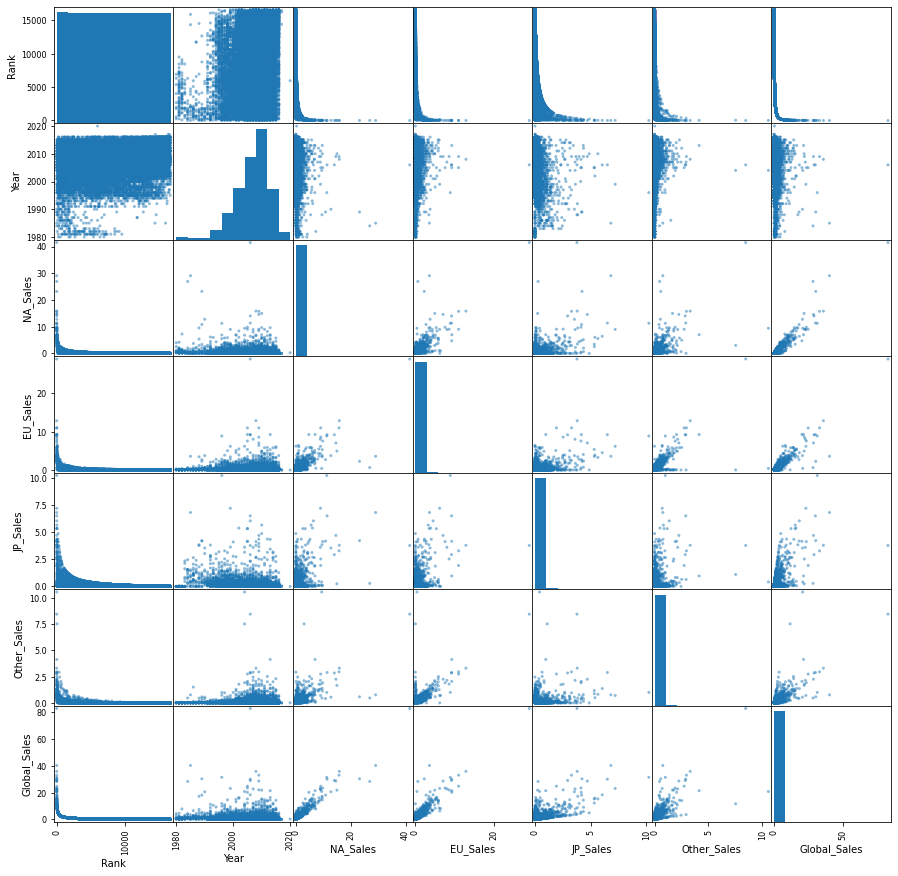

In [18]:
pd.plotting.scatter_matrix(sales, figsize=(15,15));

## 1. What genre games had been made the most

In [19]:
sales.Genre.value_counts()

Action          3253
Sports          2320
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1229
Platform         876
Simulation       851
Fighting         837
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

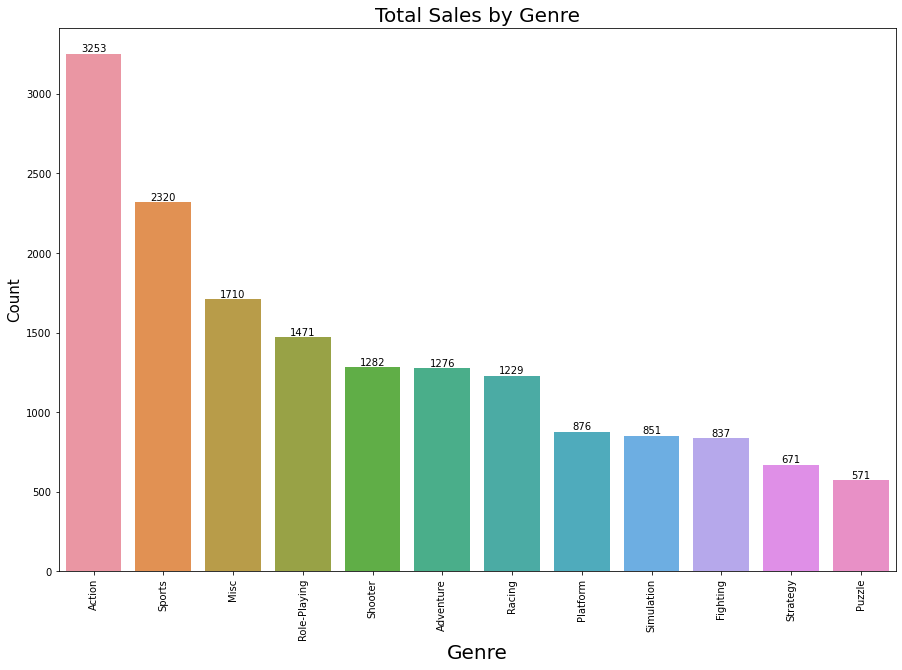

In [20]:
plt.figure(figsize=(15, 10))
a=sns.countplot(x="Genre", data=sales, order = sales['Genre'].value_counts().index)
a.bar_label(a.containers[0])
a.tick_params(axis = "x", rotation=90)
plt.xticks(rotation=90);
plt.xlabel("Genre", fontsize=20);
plt.ylabel("Count", fontsize=15);
plt.title("Total Sales by Genre", fontsize=20);

> **The `Action` genre had the most sales among all genres followed by `Sports`**

 ## 2. Which year had the most game release?

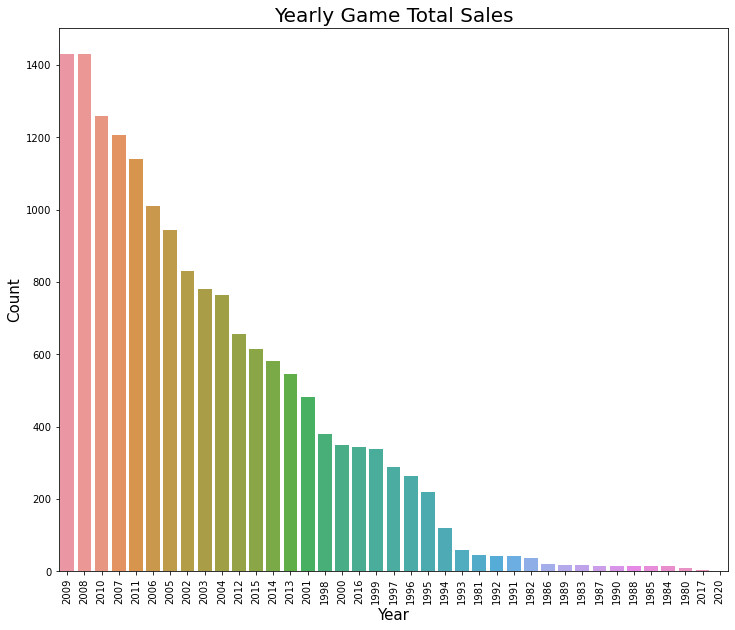

In [21]:
plt.figure(figsize=(12, 10))
sns.countplot(x="Year", data=sales, 
              order = sales.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90);
plt.xlabel('Year', fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Yearly Game Total Sales", fontsize=20);

> - **2008 and 2009 recorded the highest game sales. Since 1993, there has been a progressive increase in game sales.**

## 3. Top 5 years games release by genre.

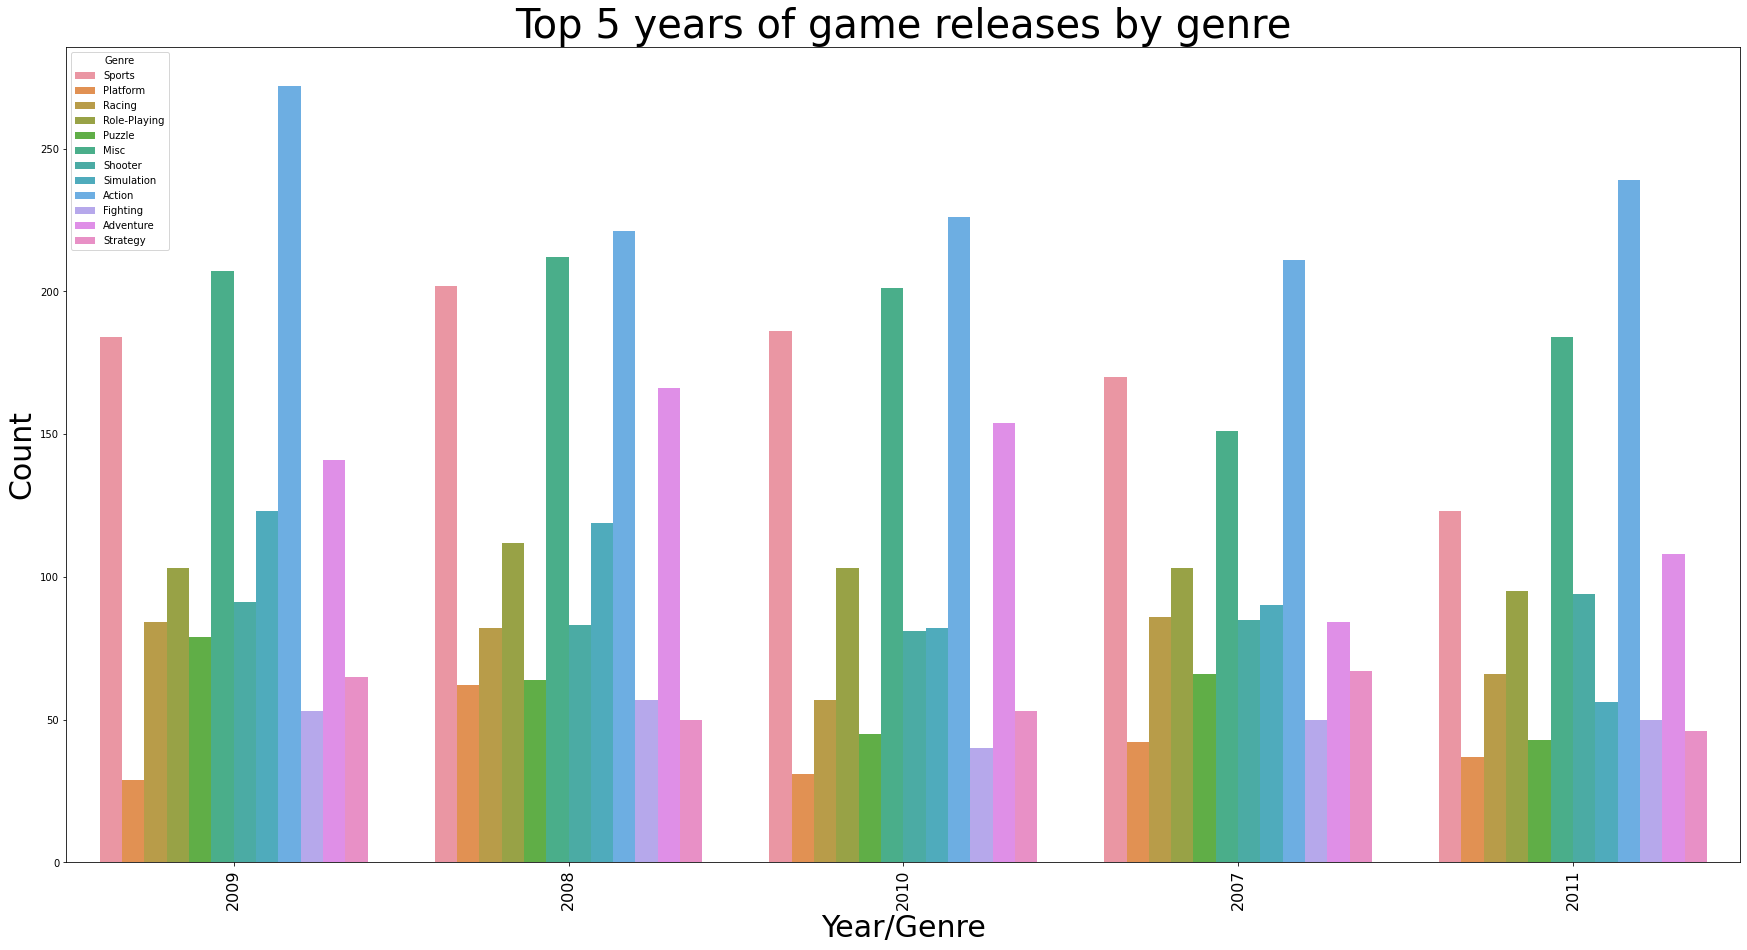

In [27]:
plt.figure(figsize=(30, 15))
sns.countplot(x="Year", 
              data=sales, 
              hue='Genre', 
              order=sales.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)
plt.xlabel("Year/Genre", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.title("Top 5 years of game releases by genre", fontsize=40);

> - **Here we can see that the top 5 game release years range between 2007 and 2011.**

> - **The `Action` genre has the leading sales in all the years followed by Misc**

## 4. Which year had the highest sales worldwide?

In [29]:
data_year = sales.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global_Sales'], ascending=False)

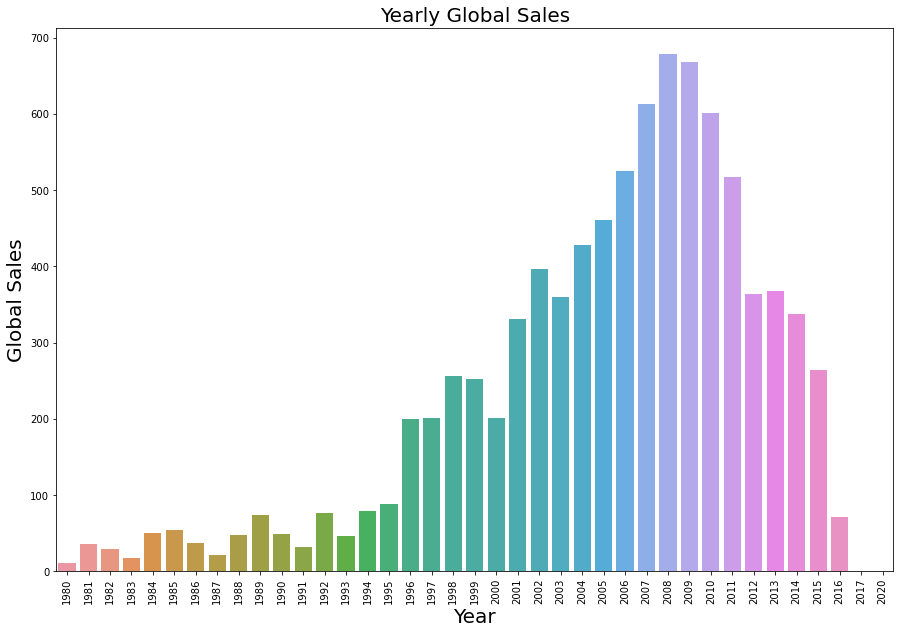

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Global Sales", fontsize=20)
plt.title("Yearly Global Sales", fontsize=20);

> **This graph shows that 2008 had the most global sales of 600+ sales. 2009 seconds this with a slight difference from 2008. There's also a sigificant increas over the years since 1995. As from 2009, there's a significant decrease in sales. In 2017, there was a drastic drop in sales.**

## 5. Which genre game has been released the most in a single year?

In [33]:
year_max_sales = sales.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_sales.groupby(['Year'])['count'].transform(max) == year_max_sales['count']
year_max_genre = year_max_sales[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

In [34]:
genre = year_max_genre['Genre'].values

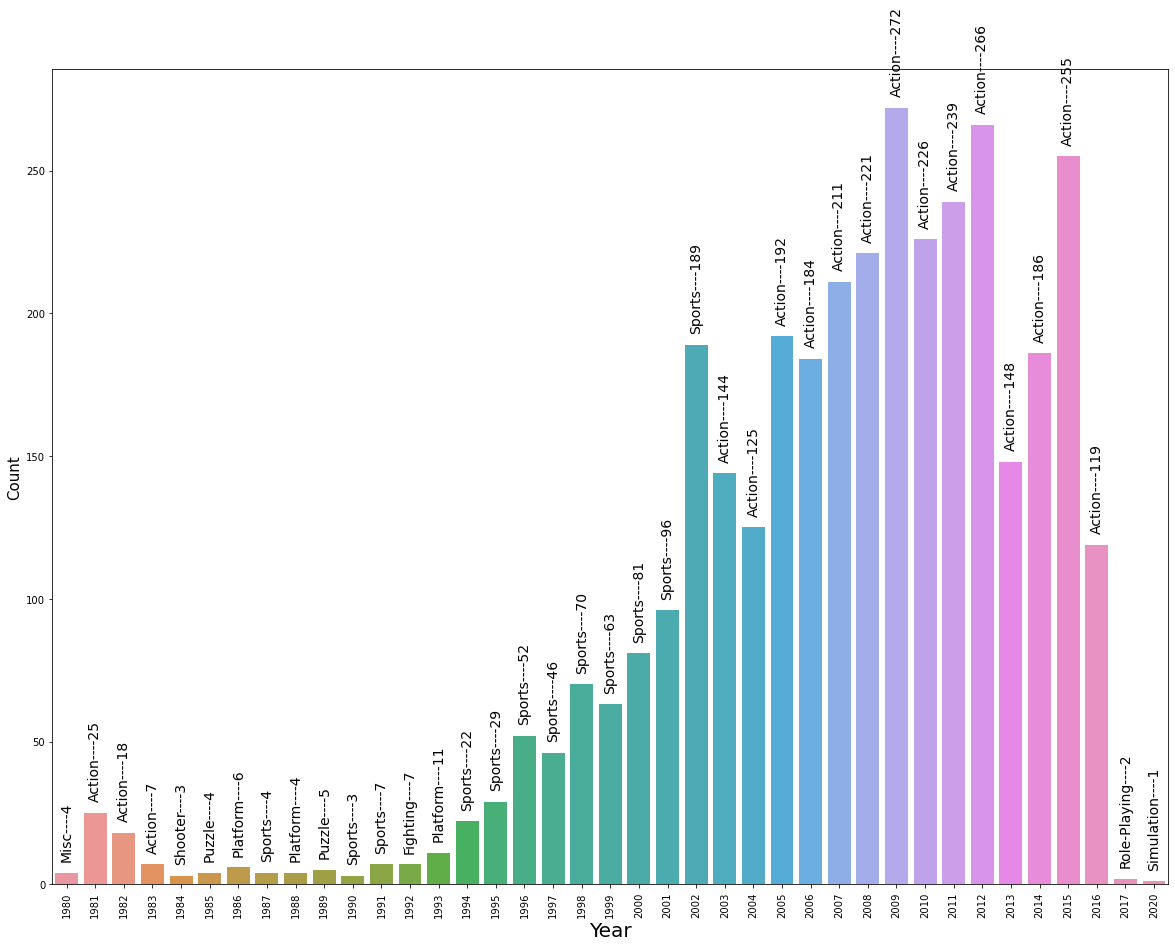

In [35]:
plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


plt.xticks(rotation=90)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Count", fontsize=15)
plt.show();

> **Since 2013, the `Action` genre releases has been dominating the market having 2009 as the year that had the most sales in action games followed by 2012 and 2015**

## 6.  Which genre game has sold the most in a single year?

In [36]:
year_sale_dx = sales.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
# year_sale_max

In [37]:
genre = year_sale_max['Genre']

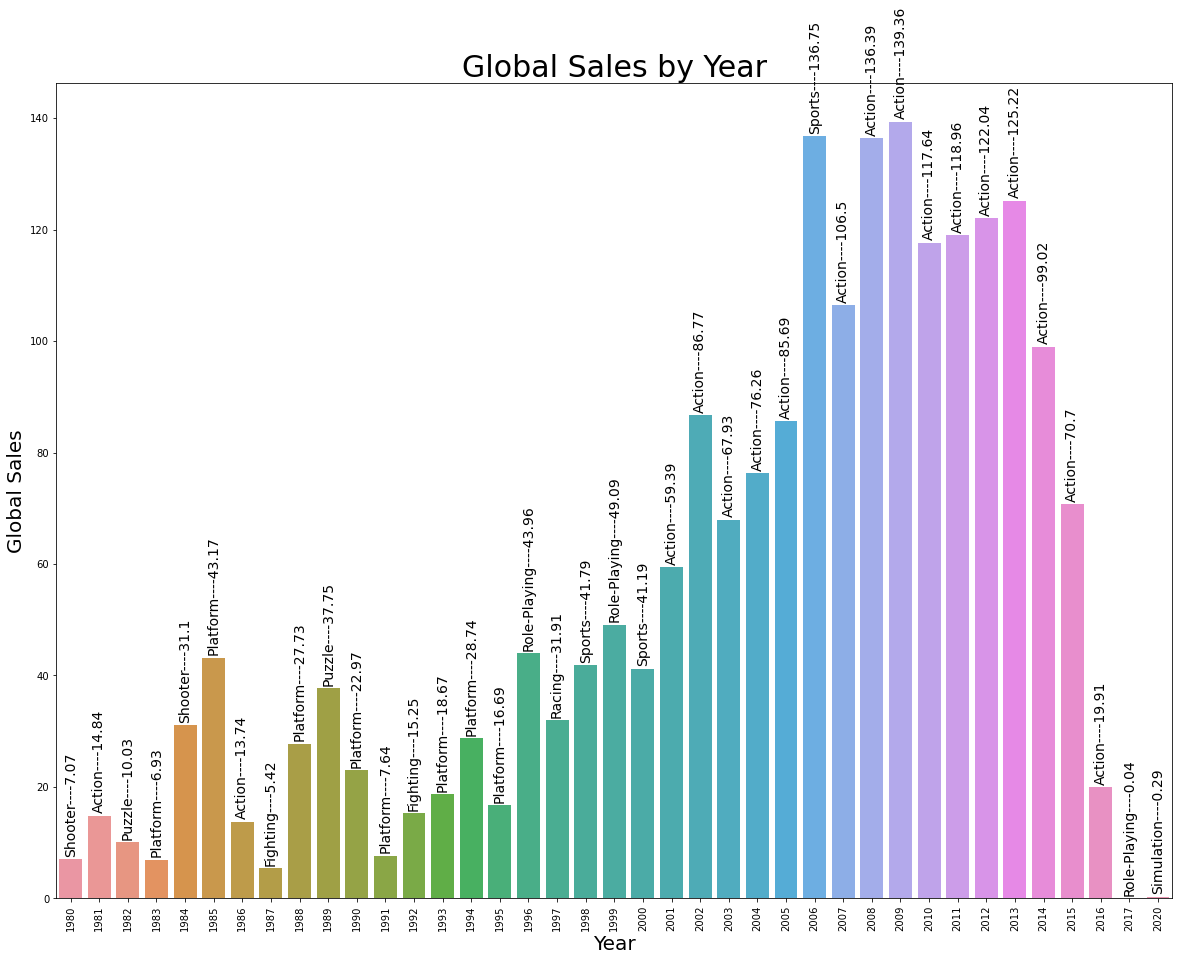

In [39]:
plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, 
           str(genre[index] + '----' +str(round(value, 2))), 
           color='#000', 
           size=14, 
           rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Global Sales", fontsize=20)
plt.title("Global Sales by Year", fontsize=30);
plt.show()

> **This graph shows that on a global level, 2006 recorded the hghest global sales in the `Sports` genre. Could thus be because of the 2006 FIFA World Cup in Germany?**

> **What follows this in the `Action` in the year 2009 and 2008, respectively.**

## 7. Which genre game have the highest sale price globally

In [40]:
data_genre = sales.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

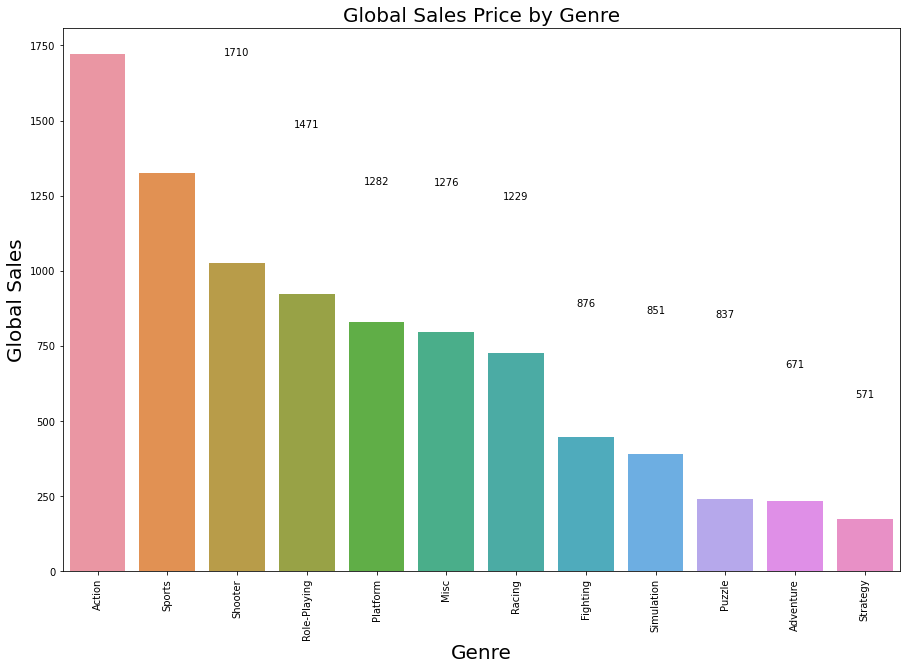

In [42]:
plt.figure(figsize=(15, 10))
b=sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
b.bar_label(a.containers[0])
b.tick_params(axis = "x", rotation=90)
plt.xticks(rotation=90);
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Global Sales", fontsize=20)
plt.title("Global Sales Price by Genre", fontsize=20);

> **Here we can see that `Action`(1710) recorded the highest sale price globally followed by `Sports`(1471).**

## 8. Which platform have the highest sale price globally

In [44]:
data_platform = sales.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

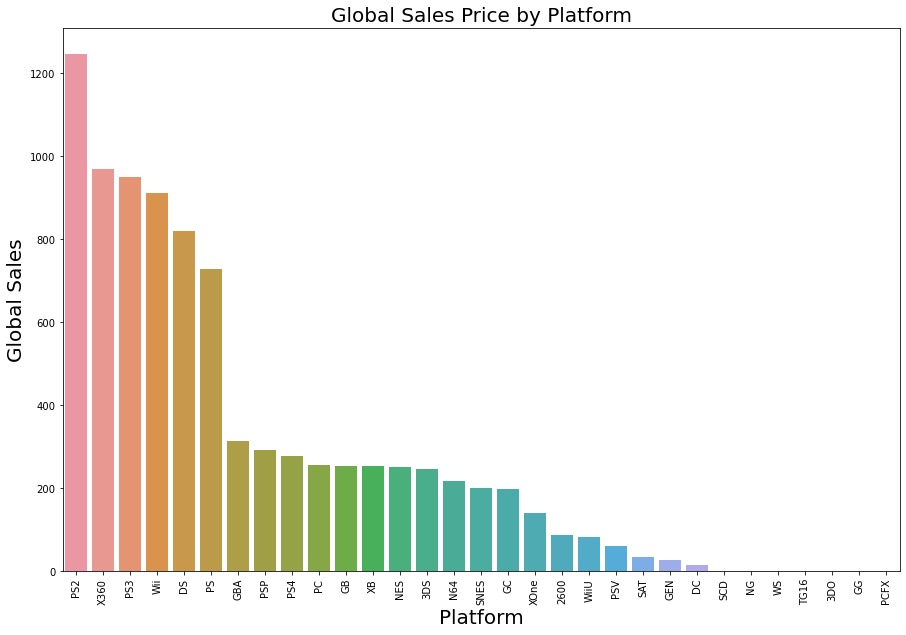

In [45]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90);
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Global Sales", fontsize=20)
plt.title("Global Sales Price by Platform", fontsize=20)
plt.show()

**The graph clearly shows the leaders in total global sales: PS2, X360, PS3, Wii, DS, PS. There is a gap of 2-4 times compared to the next platform in revenue PS4. The data of the top 6 platforms is the main contender for detailed further analysis. However, you must first check the relevance of certain platforms.**

## 9. Which individual game has the highest sale price globally?

In [46]:
top_game_sale = sales.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
# top_game_sale

In [47]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

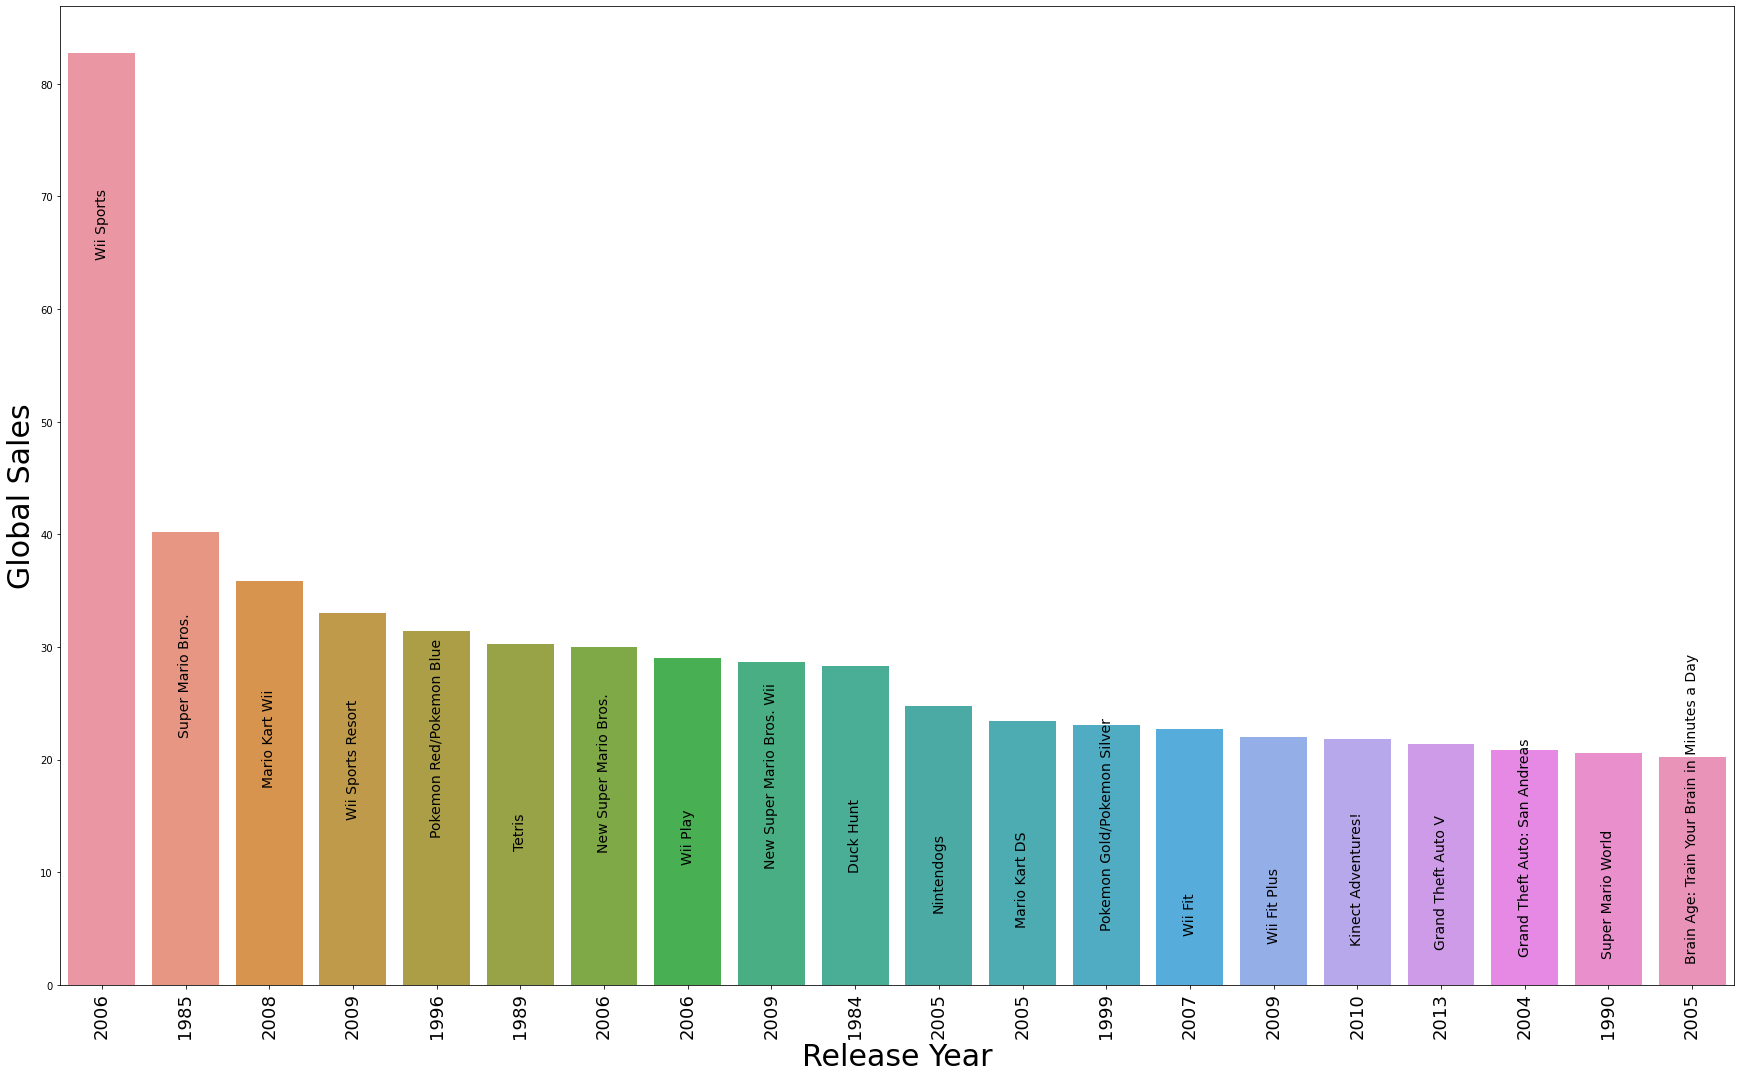

In [49]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=18, rotation=90)
plt.xlabel('Release Year', fontsize=30)
plt.ylabel("Global Sales", fontsize=30)
plt.show()

> **The graph shows 2006 with the highest global sales having `Wii Sports` games as the reason for its high sales.**

## 10. Sales comparison by genre

In [50]:
comp_genre = sales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

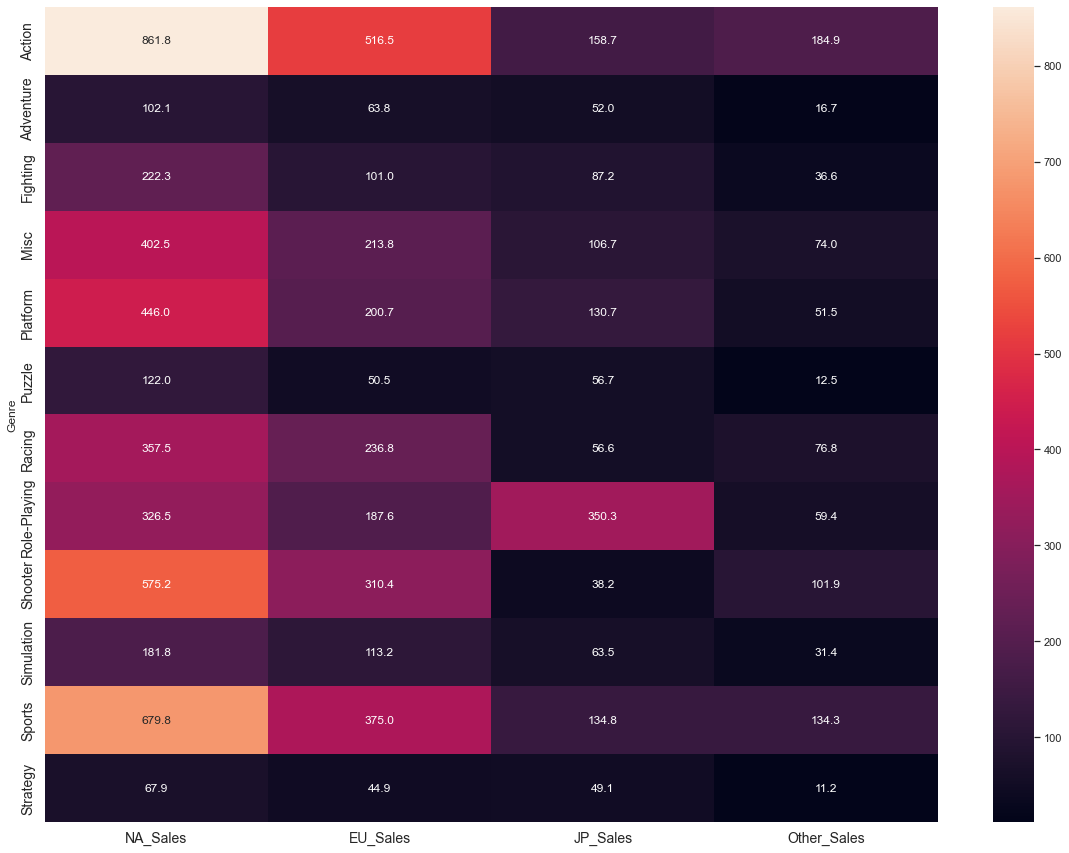

In [51]:
plt.figure(figsize=(20, 15))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

> **`Action` games are dominating the market mainly in Noth America And the European Market. What follows this is the `Shooter` genre and `Sports` that dominates the North American market. The Japanese market seem to be mainly active in `Role-Playing` genre followed by the `Sports` genre in the European market.**

In [52]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], 
                     value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                     var_name='Sale_Area', 
                     value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,861.80
1,Adventure,NA_Sales,102.06
2,Fighting,NA_Sales,222.31
3,Misc,NA_Sales,402.48
4,Platform,NA_Sales,445.99


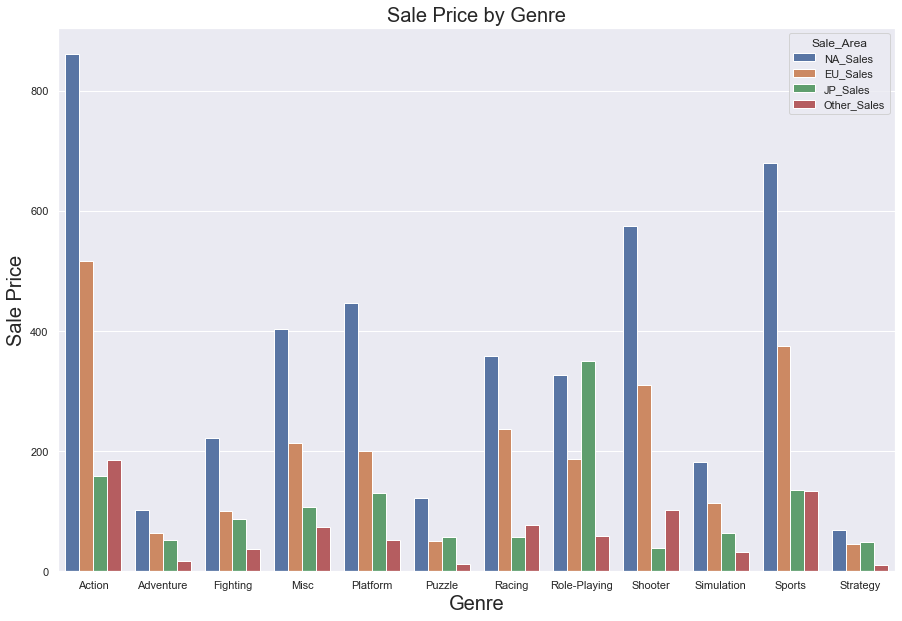

In [53]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', 
            hue='Sale_Area', 
            data=comp_table);
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Sale Price", fontsize=20)
plt.title("Sale Price by Genre", fontsize=20);

> **North America seems to be dominating the market in terms of high prices in their sales in all the genres, `Action` being the most expensive. The European market seconds this high prices except in Japan where `Role-Playing` seconds the prices of the `Action` genre followed by the `Puzzle`  and `Strategy` genre.**

## 11. Sales comparison by platform

In [54]:
comp_platform = sales[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [56]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [57]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.03
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.57


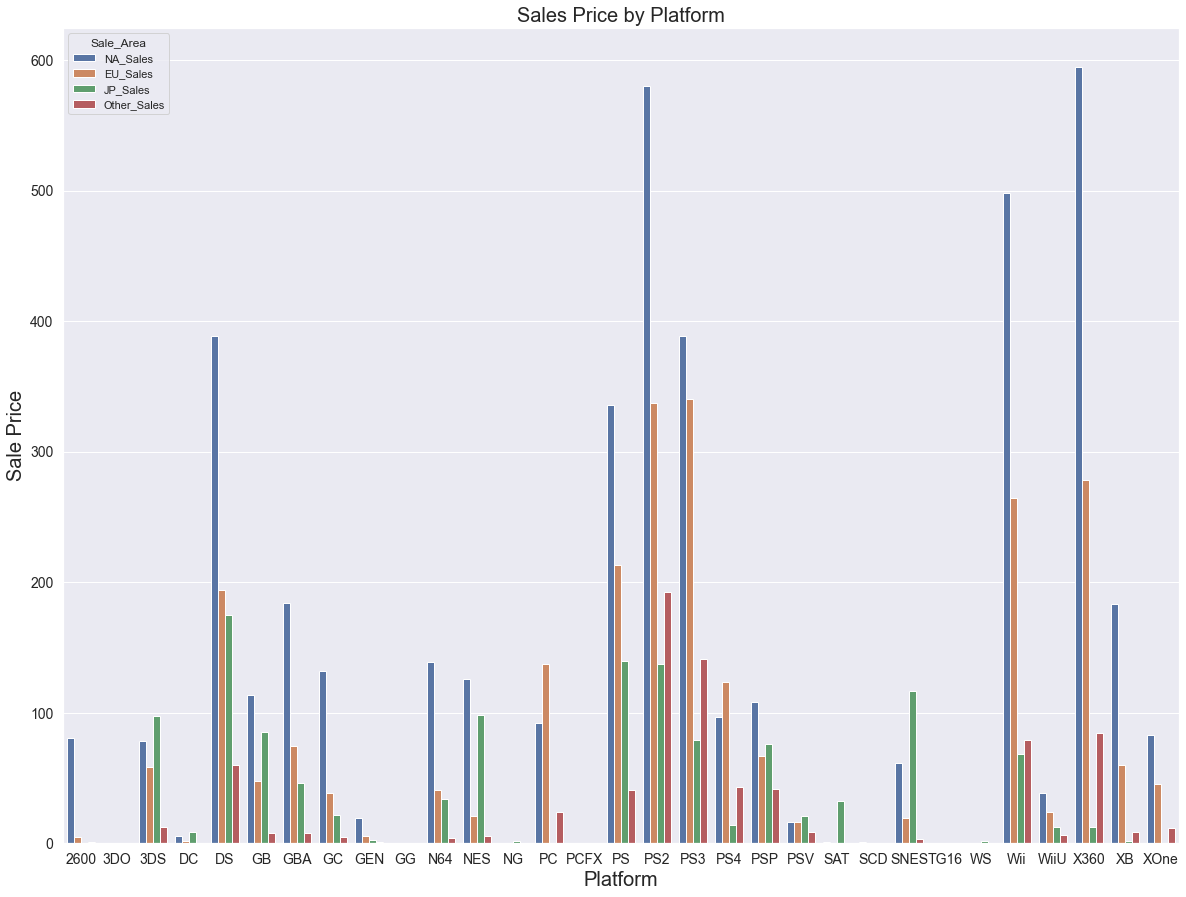

In [58]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sale Price", fontsize=20)
plt.title("Sales Price by Platform", fontsize=20)
plt.show();

> **This graph shows `PS2`(Sony) and `X360`(Miscrosoft) with the highest sale prices. Once again, the north American market is leading in platform sales prices apart of the Japanese market where `3DS`(Nintendo 3DS) and `SNESTG16`((SNES/TG16), Super Nintendo Entertainment System) records a higher platform sale price than North America.**

## 12. Top 20 Publishers

In [59]:
top_publisher = sales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

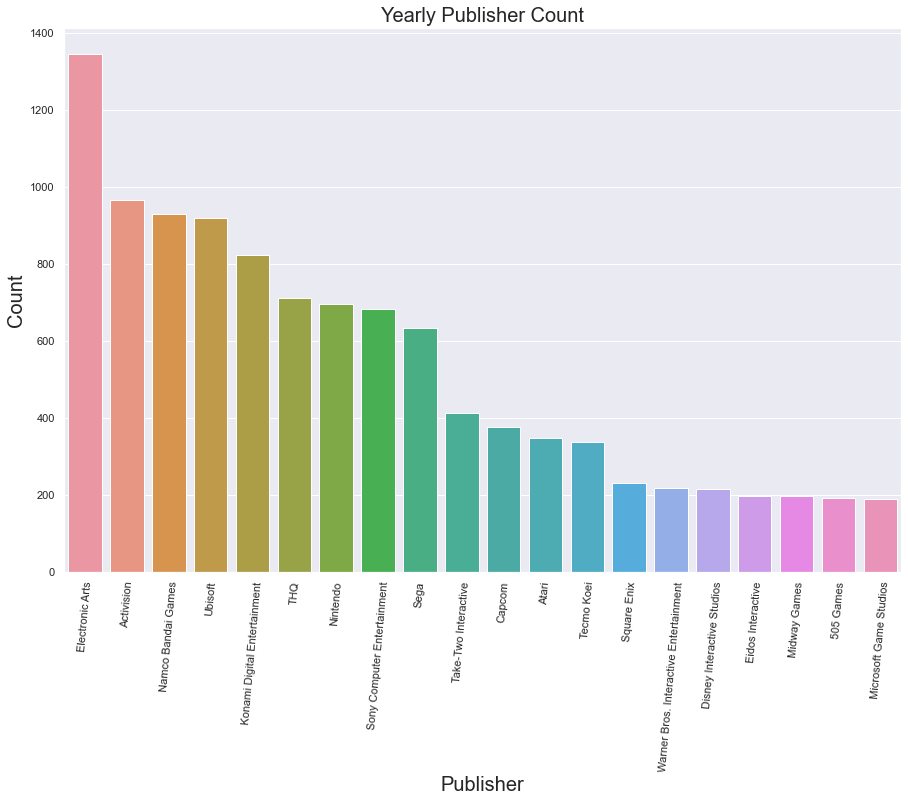

In [66]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", 
              data=sales, 
              order=sales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=85);
plt.xlabel("Publisher", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Yearly Publisher Count", fontsize=20);

> **This chart shows `Electronic Art`(also known as EA Games <a href="ea.com"></a>) publishers to have the highest sale counts, followed by `Activision`. Both of this publisher are one of the top publishers situated in the United States so it's safe to assume that the American Market dominates the publisher market as well.**

## 13. Top global sales by publisher

In [68]:
sale_pbl = sales[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

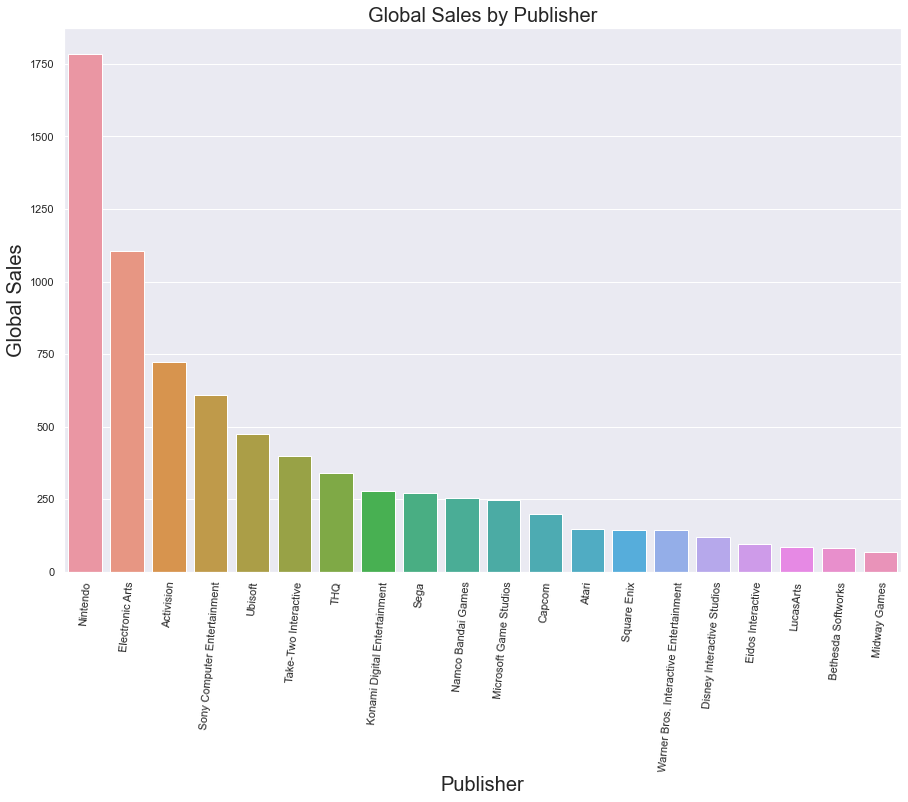

In [69]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=85);
plt.xlabel("Publisher", fontsize=20);
plt.ylabel("Global Sales", fontsize=20)
plt.title("Global Sales by Publisher", fontsize=20);

> **From this observation, we can wee that on a global level, `Nintendo` publisher is leading in sales. Nintendo is a 
Japanese multinational video game and consumer electronics company. There a gap of 2-3x gap in sales of Nintendo recorded for Electronic Arts.**

## 14. Publisher Comparison

In [70]:
comp_publisher = sales[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [71]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

In [72]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.75
1,Electronic Arts,NA_Sales,590.58
2,Activision,NA_Sales,426.01
3,Sony Computer Entertainment,NA_Sales,265.22
4,Ubisoft,NA_Sales,252.81
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.15
76,Eidos Interactive,Other_Sales,7.90
77,LucasArts,Other_Sales,10.28
78,Bethesda Softworks,Other_Sales,10.10


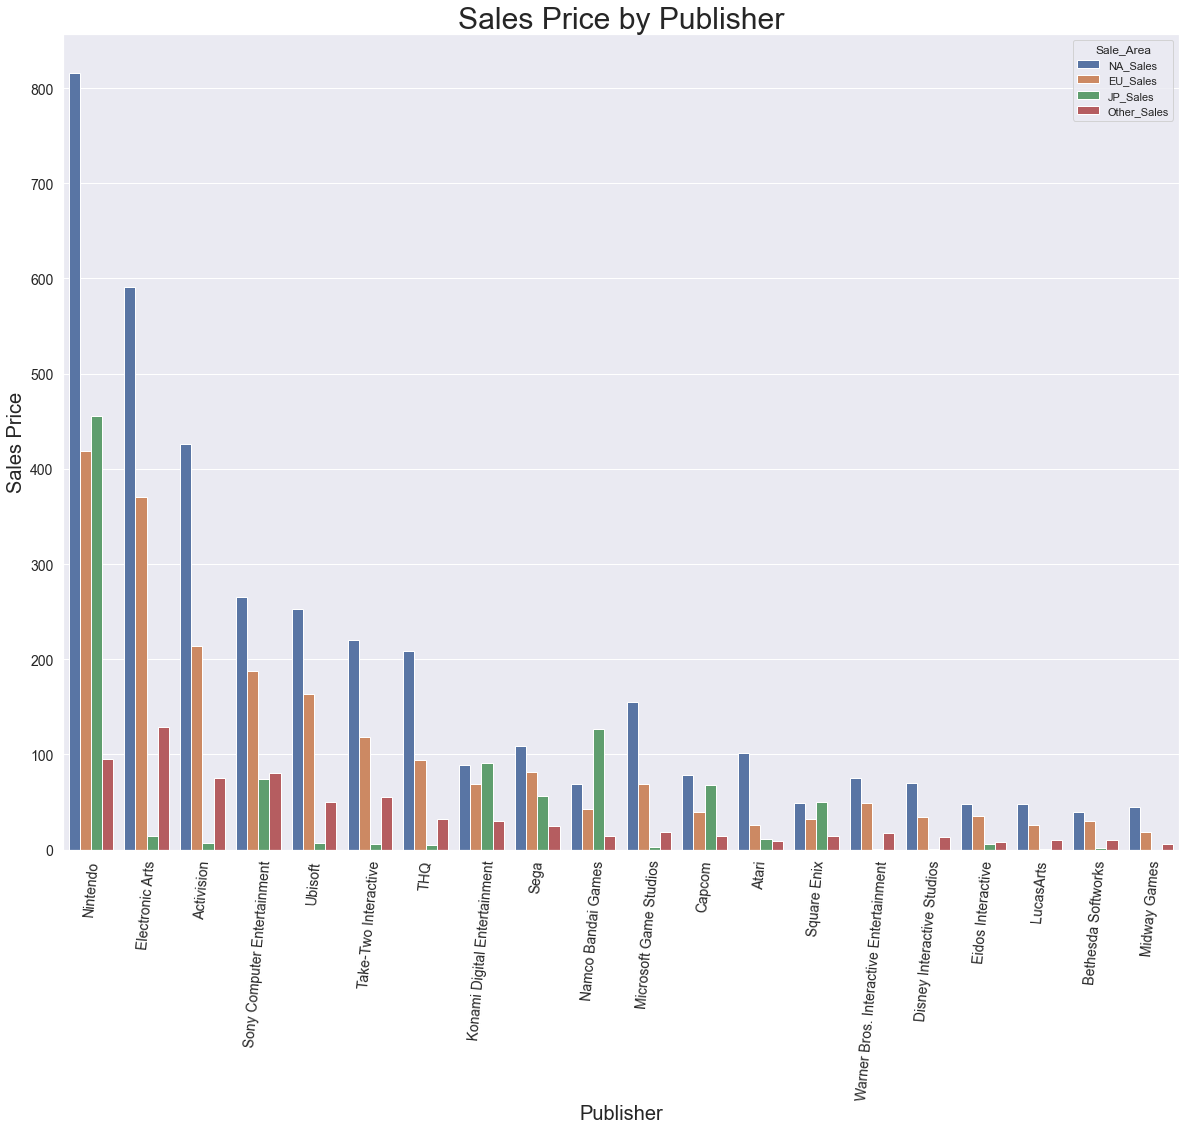

In [76]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=85)
plt.yticks(fontsize=14)
plt.xlabel("Publisher", fontsize=20)
plt.ylabel("Sales Price", fontsize=20)
plt.title("Sales Price by Publisher", fontsize=30)
plt.show()

> **The observations above show `Nintendo` to have the highest sale price in the North American market followed by the Japanese market. Once again the North american dominates the sale prices across different publisher with an exception of`Konami Digital Entertainment`, `Namco Bandai Games` and `Square Enix` which are Japanese companies.**

> **The other observation made is that European market Publisher sale price are second after North America. However, this is not the case with `Nintendo`, `Konami Digital Entertainment`, `Namco Bandai Games`, `Capcom` and `Square Enix` where the Japansese publisher prices is leading.**

## 15. Top publisher by Count each year

In [79]:
top_publisher =  sales[['Year', 'Publisher']]
top_publisher_sales = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_sales.groupby(by=['Year'])['Count'].transform(max) == top_publisher_sales['Count']
top_publisher_count = top_publisher_sales[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_count

In [80]:
publisher= top_publisher_count['Publisher']

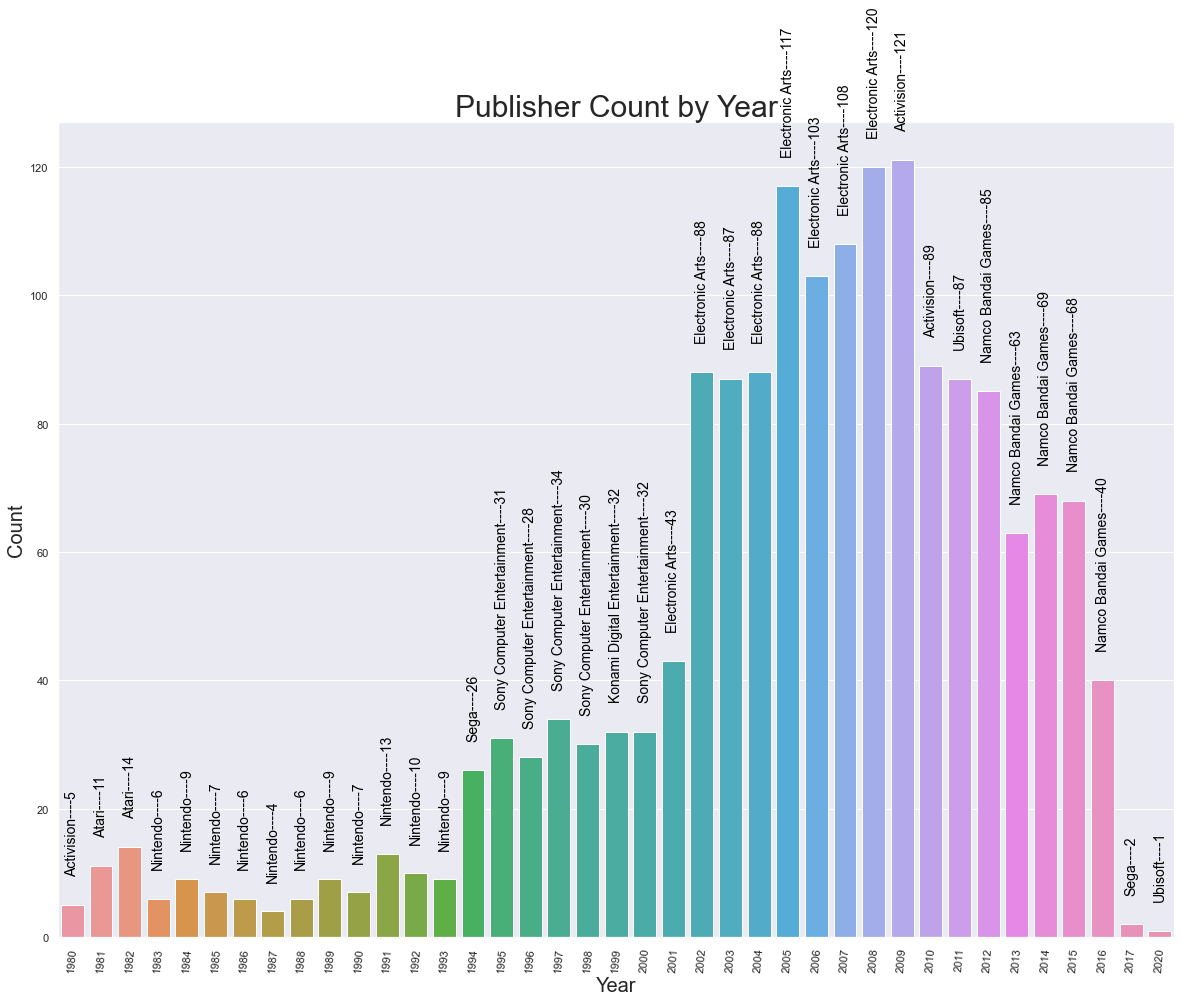

In [83]:
plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1



plt.xlabel("Year", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Publisher Count by Year", fontsize=30)
plt.xticks(rotation=85)
plt.show()

> **EA Games Publisher is the leading publisher between the years 2002 to 2008 (6yrs). Activision took the lead to be the top publisher that have the highest count between 1980 to 2020. EA Games seconds this**

## 16. Total revenue by Region

In [84]:
top_sale_reg = sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4345.26
1,EU_Sales,2414.28
2,JP_Sales,1284.40
3,Other_Sales,791.22


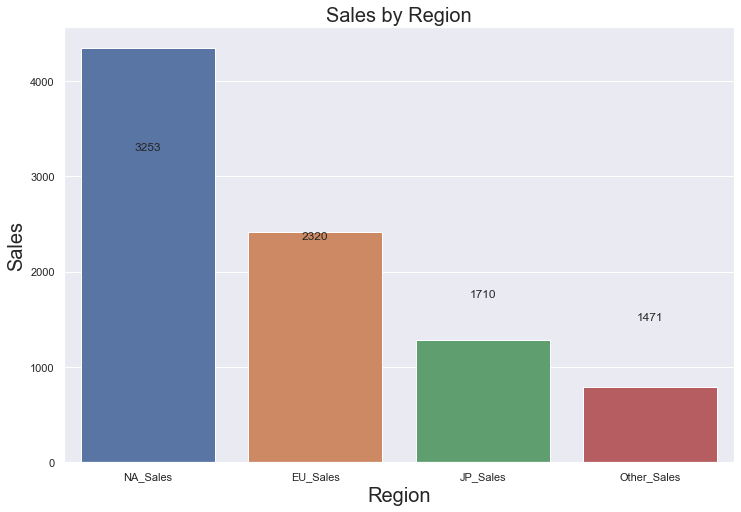

In [85]:
plt.figure(figsize=(12, 8))
c=sns.barplot(x='region', y='sale', data = top_sale_reg);
c.bar_label(a.containers[0])
c.tick_params(axis="x", rotation=0)
plt.xlabel("Region", fontsize=20)
plt.ylabel("Sales", fontsize=20)
plt.title("Sales by Region", fontsize=20)
plt.show()

### Pie chart of region sale

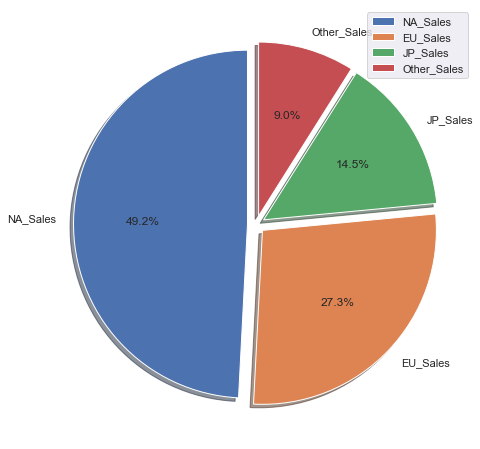

In [58]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
explode= [0.05, 0.05, 0.05, 0.05]
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=90,
       explode=explode);
plt.rcParams['font.size']=20
plt.legend();

> **The bar chart and pie chart show that North America contributes to half of the profits made from game purchases, 49.2% to be exact followed by the European market which contributes to 27.3% of the profits recieved**

## 17. Sales Histogram

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

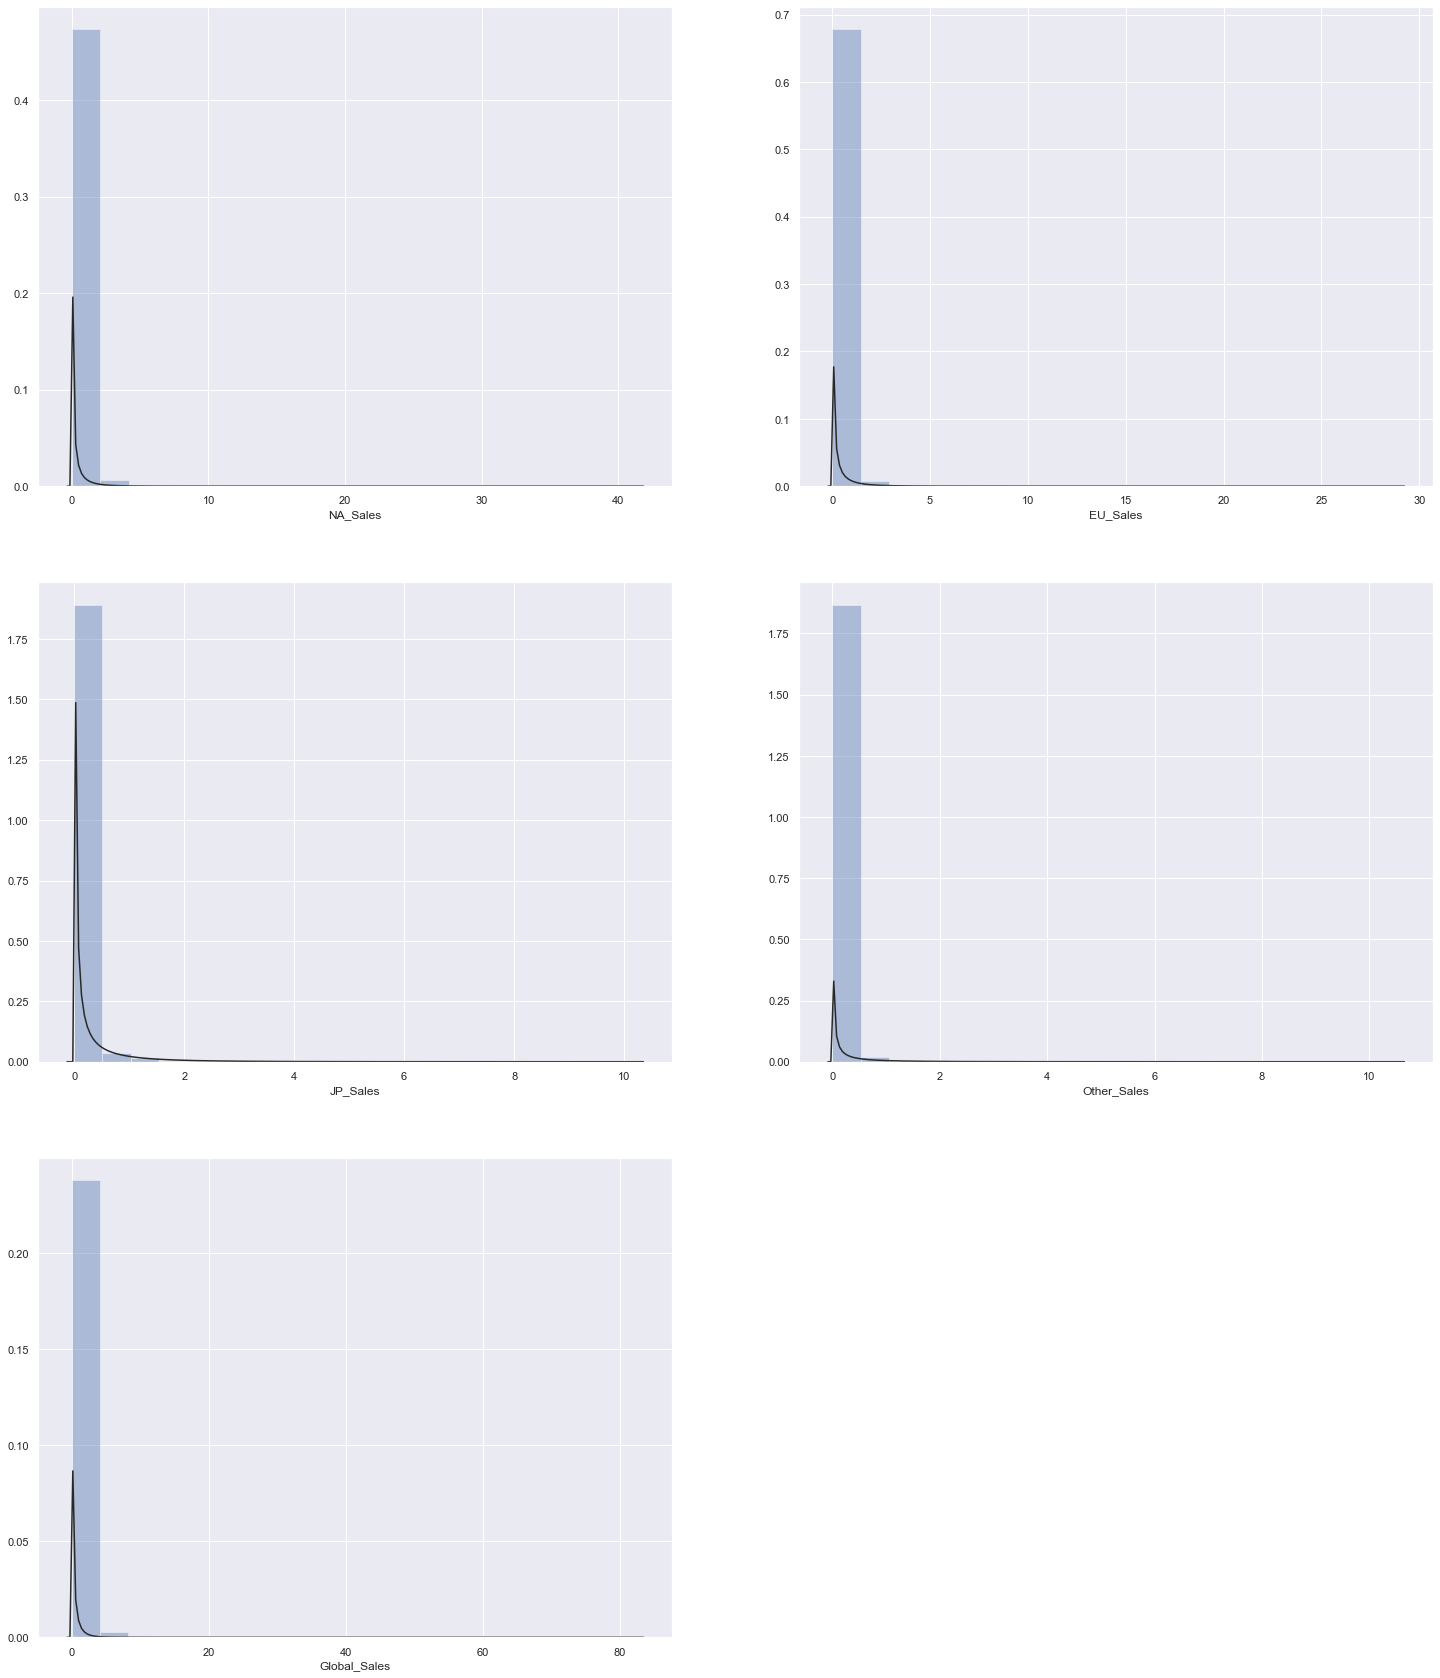

In [86]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(sales[column], bins=20, kde=False, fit=stats.gamma)

 > **Distribution After log transformation**

In [87]:
data_hist_log = sales.copy()
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

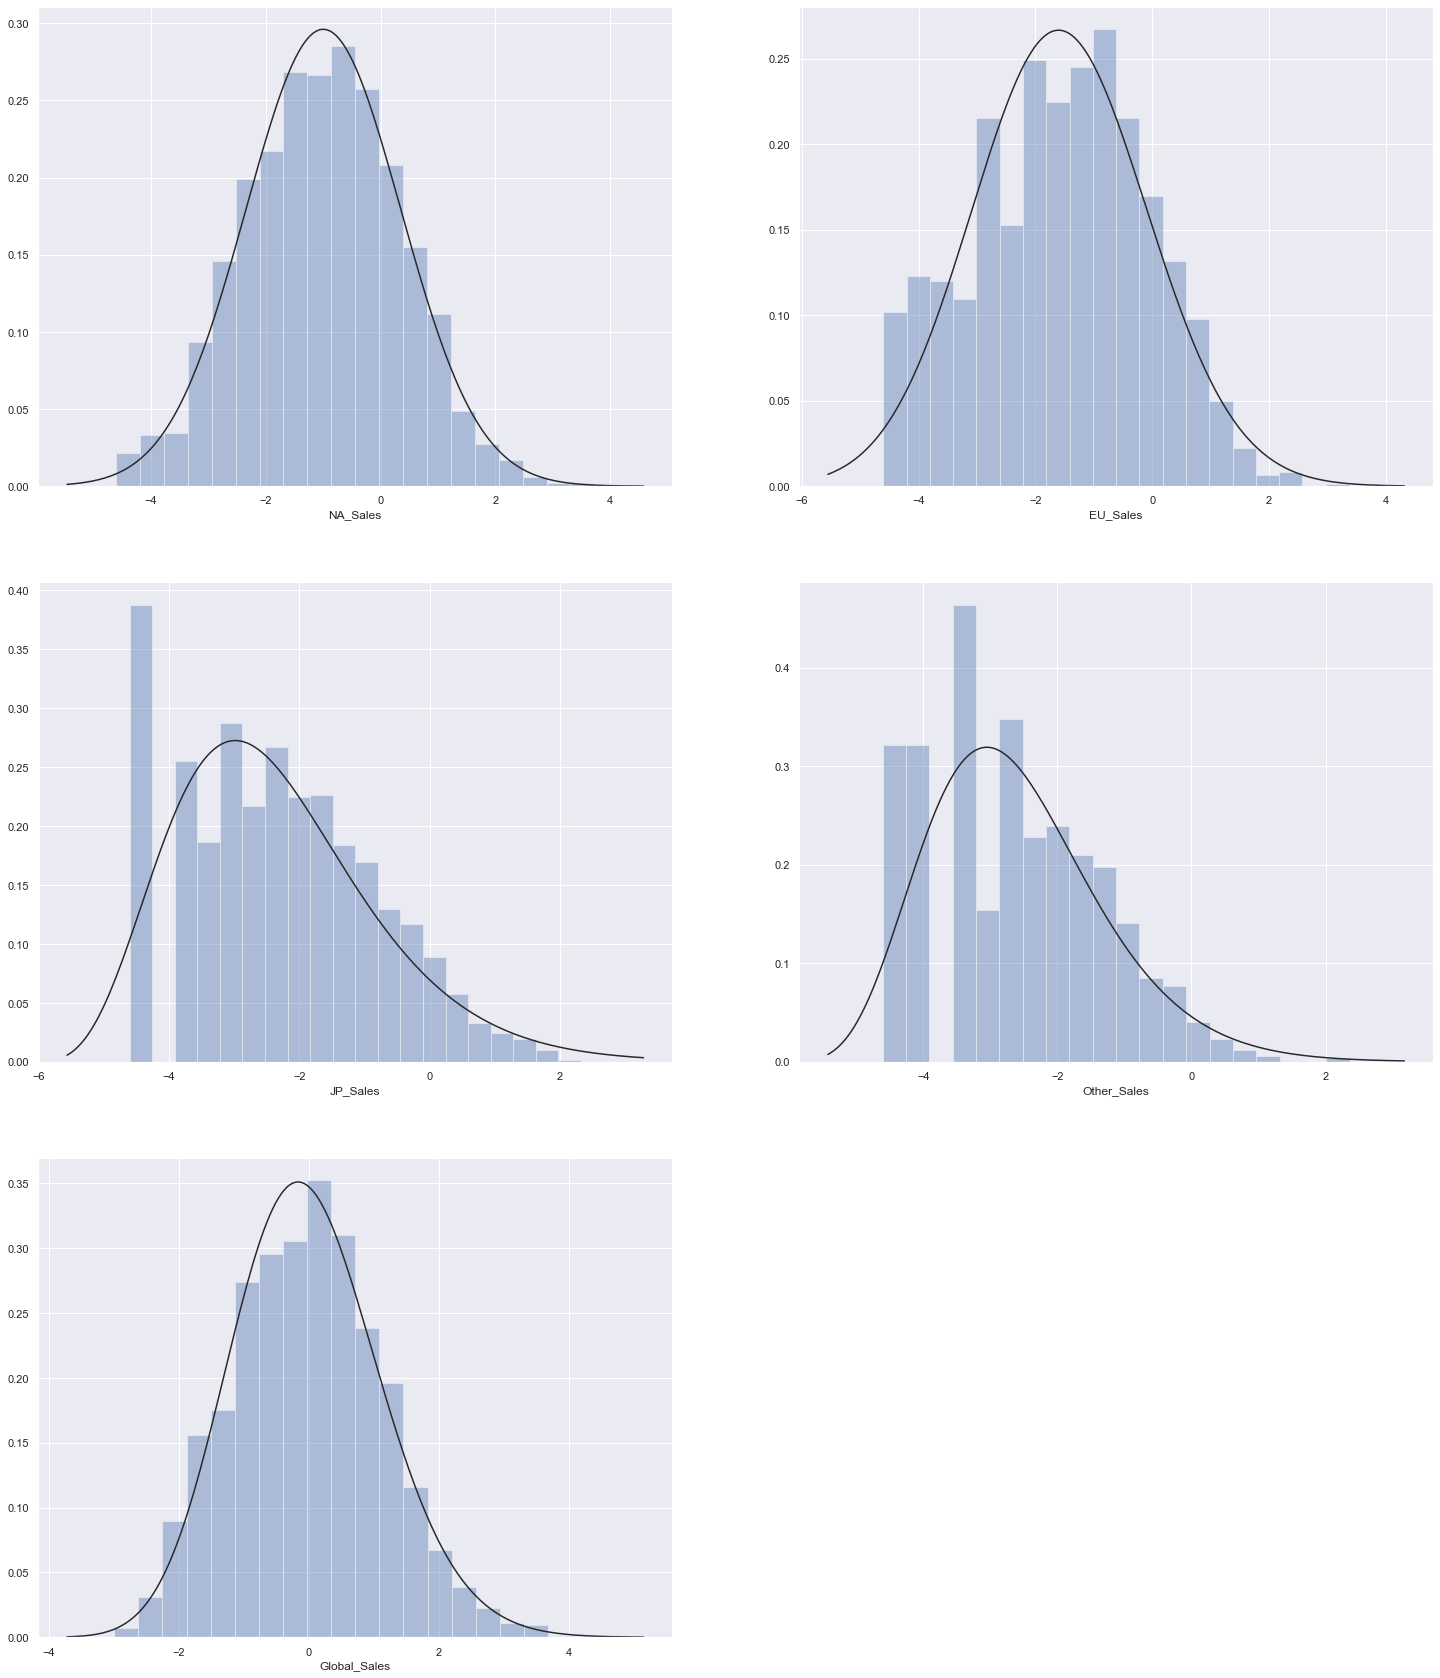

In [89]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma);

> **You can see their skewness and central tendency. we can say that our almost all data are right skewed and symmetric skewed after log transformation**

## 18. Relations of columns

### Heatmap

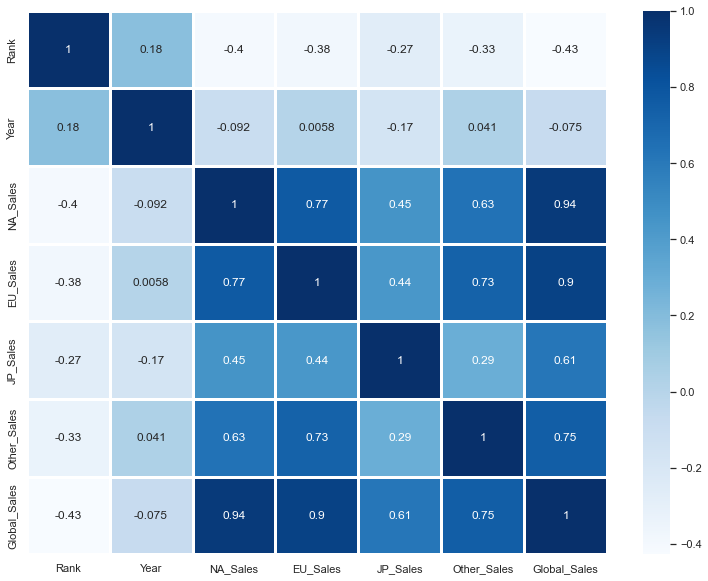

In [90]:
plt.figure(figsize=(13,10))
sns.heatmap(sales.corr(), cmap = "Blues", annot=True, linewidth=3);

> **We can see that NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly correlated**

### Pair plot

In [91]:
data_pair = sales.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16342,2002,GBA,Platform,0.01,0.00,0.00
16343,2003,GC,Shooter,0.01,0.00,0.00
16344,2008,PS2,Racing,0.00,0.00,0.00
16345,2010,DS,Puzzle,0.00,0.01,0.00


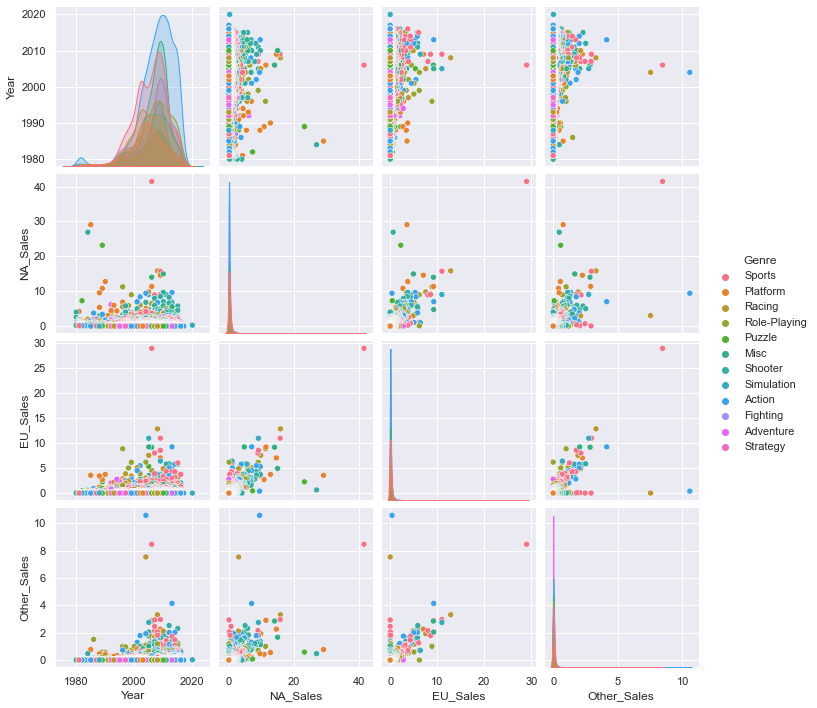

In [92]:
sns.pairplot(data_pair, hue='Genre');

### Log work

In [93]:
data_pair_log = data_pair.copy()

In [94]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [95]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77
2,2008,Wii,Racing,15.85,12.88,3.31
3,2009,Wii,Sports,15.75,11.01,2.96
4,1996,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
13887,2016,PS4,Adventure,0.01,0.02,0.01
13976,2014,PS3,Racing,0.02,0.01,0.01
13978,2011,PC,Puzzle,0.01,0.02,0.01
14060,2007,PC,Puzzle,0.01,0.02,0.01


In [96]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

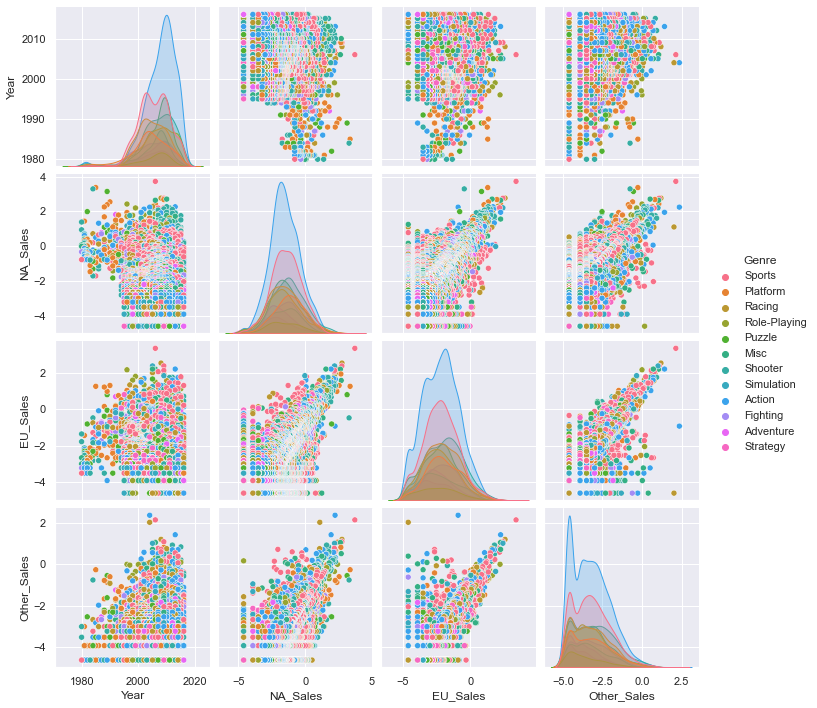

In [97]:
sns.pairplot(data_pair_log, hue='Genre',  palette="husl");

## 19. Number of Games released per year

In [98]:
# grouping data and counting the number of released games by year
games_per_year = sales.groupby('Year', as_index=False).Name \
                   .count()\
                    .rename(columns={'Name': 'Games_number'})

> Let's build a bar chart of the distribution of the number of released games by year.

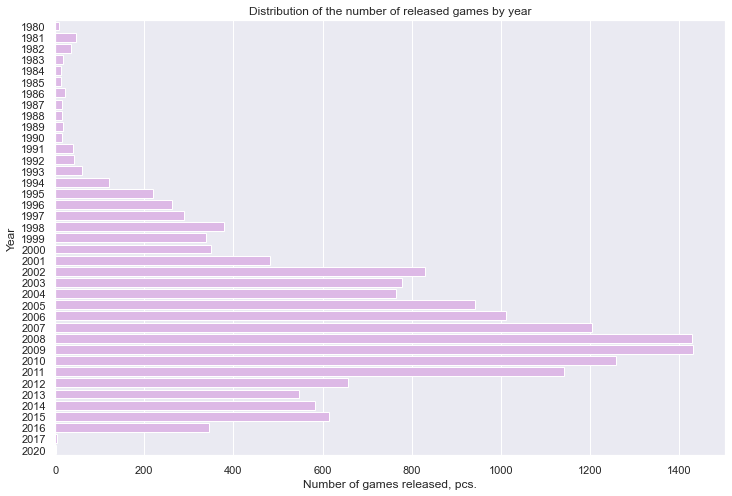

In [99]:
plt.figure(figsize=(12, 8))

# setting the parameters for plotting the graph
ax = sns.barplot(y=games_per_year.Year,
                 x=games_per_year.Games_number,
                 orient='h',
                 color='#e2b2ed'
                 );

# axis labels and titles
plt.xlabel('Number of games released, pcs.')
plt.title('Distribution of the number of released games by year');

**The graph shows that the bulk of games were released in the first decade of the twenty-first century, with a peak in 2008-2009. After 2011, there has been a significant decline in the number of released games (the rise in popularity of social networks?).**

In [100]:
# calculate the percentage for a specific year
games_per_year['percent'] = 100 * games_per_year.Games_number / games_per_year.Games_number.sum()
# calculate the accumulative percentage
games_per_year['percent_sum'] = games_per_year.percent.expanding(1).sum()

# visualization of results
games_per_year

,Year,Games_number,percent,percent_sum
0,1980,9,0.055056,0.055056
1,1981,46,0.281397,0.336453
2,1982,36,0.220224,0.556677
3,1983,17,0.103995,0.660672
4,1984,14,0.085643,0.746314
5,1985,14,0.085643,0.831957
6,1986,21,0.128464,0.960421
7,1987,16,0.097877,1.058298
8,1988,15,0.091760,1.150058
9,1989,17,0.103995,1.254053


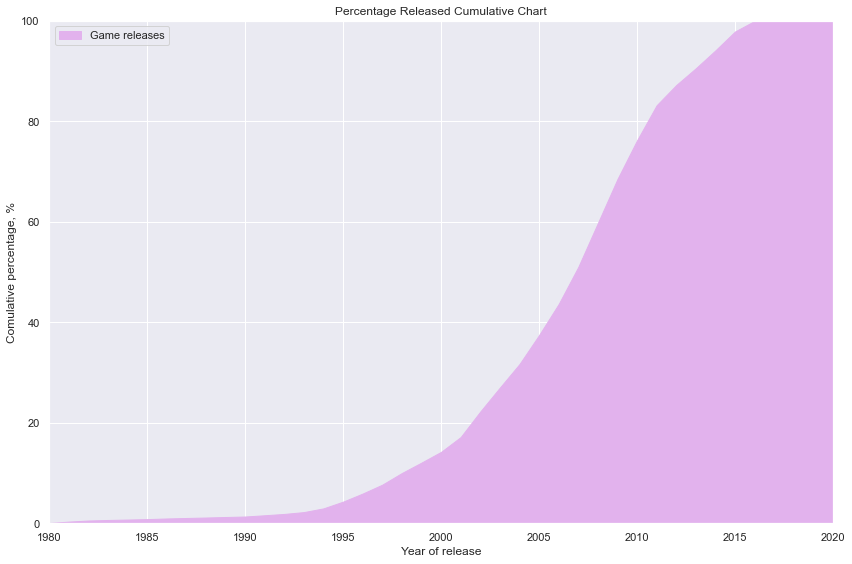

In [101]:
# data transformation
rnd = np.asarray(games_per_year.loc[:, 'percent_sum'].to_list())
years = np.asarray(games_per_year.loc[:, 'Year'].to_list())

# construction and design of the graph
fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(years, rnd, labels=['Game releases'], color='#e2b2ed')
ax.set_title('Percentage Released Cumulative Chart')
ax.legend(loc='upper left')
ax.set_xlabel('Year of release')
ax.set_ylabel('Comulative percentage, %')
ax.set_xlim(xmin=years[0], xmax=years[-1])
ax.set_ylim(ymin=0, ymax=100)
fig.tight_layout()
 
plt.show();

**According to the data obtained, it is clearly seen that for the first half of the presented period (from 1983 to 1999) about 11% of the total number of released games were released, and for the second half, the remaining 89%. Half of the released games were released between 2007 and 2016. Thus, we can conclude that the data for the 80s and 90s of the twentieth century do not carry much weight in quantitative terms for the available data set.**


> **Let's look at the dynamics of total sales.**

In [102]:
total_sales = sales.groupby('Year', as_index=False) \
    .agg({'Global_Sales': 'sum'}) \
    .sort_values('Global_Sales', ascending=False)

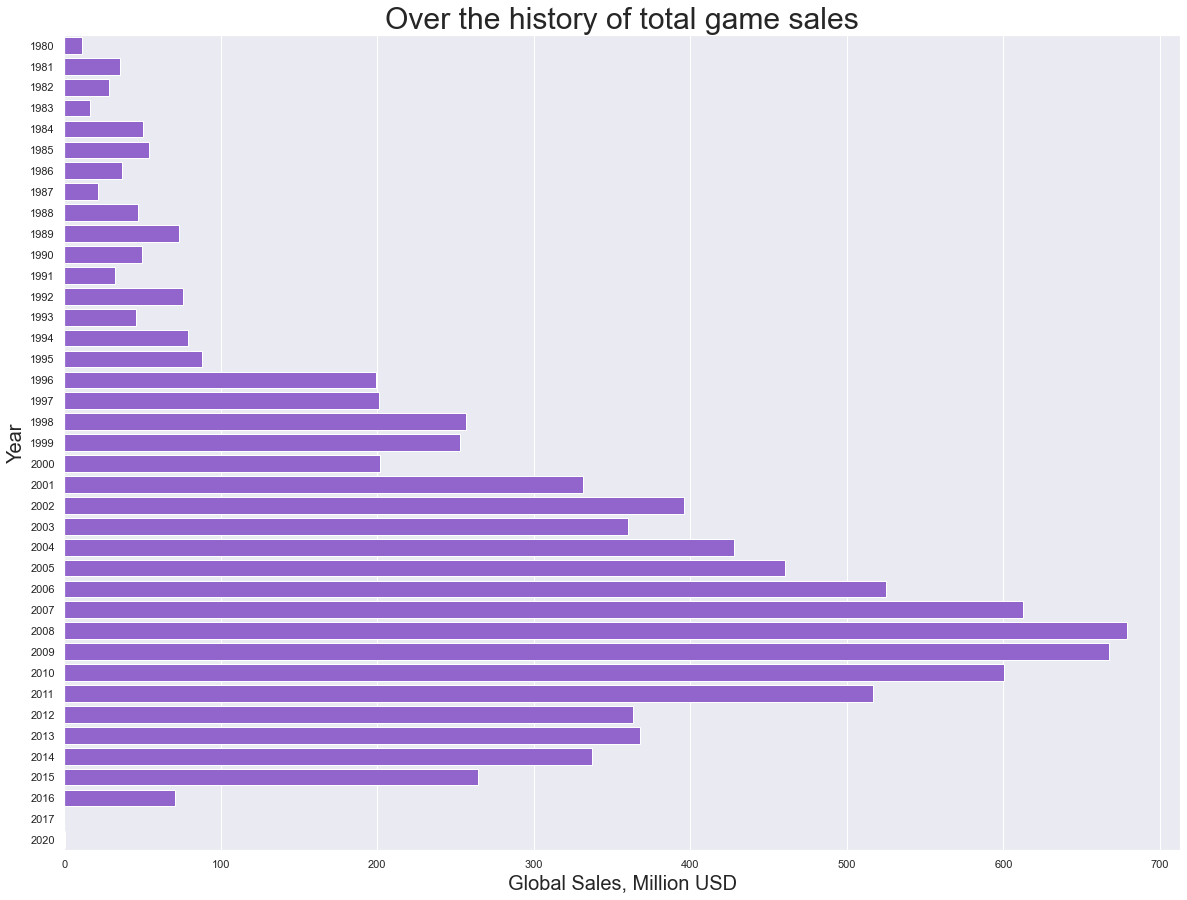

In [104]:
# figure size
plt.figure(figsize=(20, 15))

# setting the parameters for plotting the graph
ax = sns.barplot(y=total_sales.Year,
                  x=total_sales.Global_Sales,
                  orient='h',
                  color='#9054DE');

# axis labels and titles
plt.xlabel('Global Sales, Million USD', fontsize=20)
plt.ylabel('Year', fontsize=20)
plt.title('Over the history of total game sales', fontsize=30);

**The dynamics of overall sales in general closely follows the dynamics of the release of new games, with a peak in 2008-2009 and then a decline to the values of the early 2000s, when the computer games industry was at the beginning of its rise.**

> **Let's build a graph of the distribution of the life cycle of platforms. Consider the main statistics of the resulting indicator.**

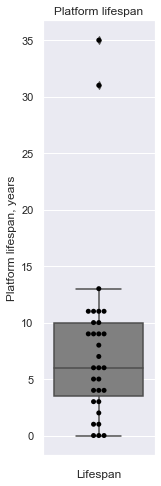

In [105]:
# calculate platform lifetime
life_span = sales.groupby('Platform').Year.max() - sales.groupby('Platform').Year.min()

# mark up space for plotting
fig, (ax1) = plt.subplots(
     nrows=1, ncols=1,
     figsize=(2, 8)
)

# plotting and designing a chart (boxplot + value points (swarmplot))
sns.boxplot(y=life_span, color='grey', ax=ax1)
sns.swarmplot(y=life_span, color='black')

# axis labels and plot name
ax1.set_title('Platform lifespan')
ax1.set_xlabel('Lifespan')
ax1.set_ylabel('Platform lifespan, years');

**The graph shows that there are two outliers, otherwise, most of the data is placed inside the interquartile range. Due to the presence of outliers, we will use the median value (6 years) when we talk about the average value of the platform life cycle.**

In [106]:
# basic platform life cycle statistics
life_span.describe()

count    31.000000
mean      7.870968
std       7.714670
min       0.000000
25%       3.500000
50%       6.000000
75%      10.000000
max      35.000000
Name: Year, dtype: float64

**The resulting graphs clearly show that the average platform life cycle is 6 years (the only exception is PC and DS). We also see that the overall bestseller PS2 has completely exhausted itself and its last sales were in 2011. Therefore, it will be incorrect for our tasks to select data by the size of sales for the entire history. We thus greatly distort the results of our research. Therefore, we will take another criterion for our sample: we will take half the value of the third quartile (5 years). Thus, our sample will include both platforms at the peak of popularity, as well as new emerging platforms that will be popular in the future.**

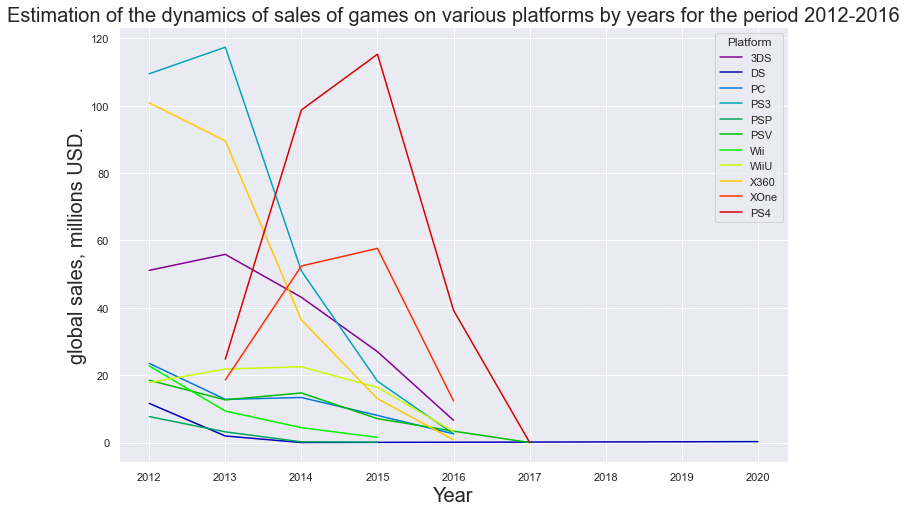

In [108]:
# grouping platform data for the last 5 years by year and platform and calculating total global sales
plt_sales_5year = sales.query('Year > 2011') \
     .groupby(['Year', 'Platform'], as_index=False) \
     .agg({'Global_Sales': 'sum'}) \
     .sort_values('Year', ascending=True)

plt.figure(figsize=(12, 8))

# chart options
sns.lineplot(x=plt_sales_5year.Year,
              y=plt_sales_5year.Global_Sales,
              hue=plt_sales_5year.Platform,
              legend='full',
              palette='nipy_spectral');

plt.xlabel('Year', fontsize=20)
plt.ylabel('global sales, millions USD.', fontsize=20);

plt.title('Estimation of the dynamics of sales of games on various platforms by years for the period 2012-2016', fontsize=20);

**Considering that our data for 2016 is not complete, having adjusted for this, using the graph above, we can say that at the moment only two platforms are still growing and promising: PS4 and XOne. The remnants of popularity are in the 3DS. Sales of games on other platforms are insignificant or tend to zero. Therefore, at this stage of the study, we will continue to work with these three platforms: PS4, XOne, 3DS.**

In [109]:
# list of the names of the three most relevant platforms
popular_platforms = ['PS4', 'XOne', '3DS']

# make a selection by platform name and year
sales_3p = sales.query('Platform in @popular_platforms & Year > 2011') \
           .reset_index(drop=True)

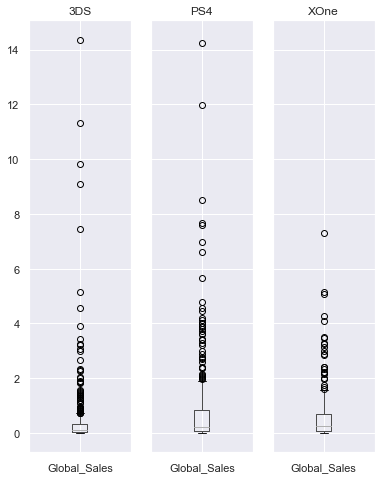

In [110]:
# build a boxplot chart (global sales by platform)
sales_3p.groupby(['Platform']).boxplot(column='Global_Sales',
                                     figsize=(6, 8),
                                     layout=(1, 3));

> Additionally, we obtain the main statistical indicators of our cut

In [111]:
# getting descriptive statistics
sales_3p.groupby(['Platform']).Global_Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
3DS,384.0,0.478516,1.343468,0.01,0.04,0.11,0.31,14.35
PS4,336.0,0.827679,1.618966,0.01,0.06,0.22,0.82,14.24
XOne,213.0,0.662254,1.039298,0.01,0.07,0.24,0.68,7.30


**According to the resulting graph, we can observe that the average values for all platforms are approximately the same. We can also tell by the presence of a large number of outliers on the charts of all platforms that the main revenue comes from a small number of hit games. Their sales are 11-20 times higher than the average total sales. Moreover, there are more such hit games both in terms of the total number and the amplitude of the observed effect on the 3DS and PS4 platforms.**

> Let's find the game with the highest global sales for each of the platforms.

In [112]:
# select indexes
sales_3p.groupby(['Platform']).Global_Sales.idxmax()

Platform
3DS      0
PS4      1
XOne    10
Name: Global_Sales, dtype: int64

In [113]:
# display the best-selling games by selected indices
sales_3p.iloc[[1, 0, 11]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
0,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
11,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96


**For the PS4 and XOne platforms, 'Call of Duty: Black Ops 3 (2015)' was the top-selling game, while for the 3DS, it was 'Pokemon X/Pokemon Y' from 2013, which confirms the thesis that the popularity of this game will decrease over time. platforms.**



> Next, let's look at the overall distribution of games by genre for the previously selected data (PS4, XOne, 3DS platforms; data from 2012).

In [114]:
# grouping by genres, sorting and selecting data
genres_sales_all = sales_3p.groupby(['Genre'], as_index=False).agg({'Global_Sales': 'sum'}).sort_values('Global_Sales', ascending=False)

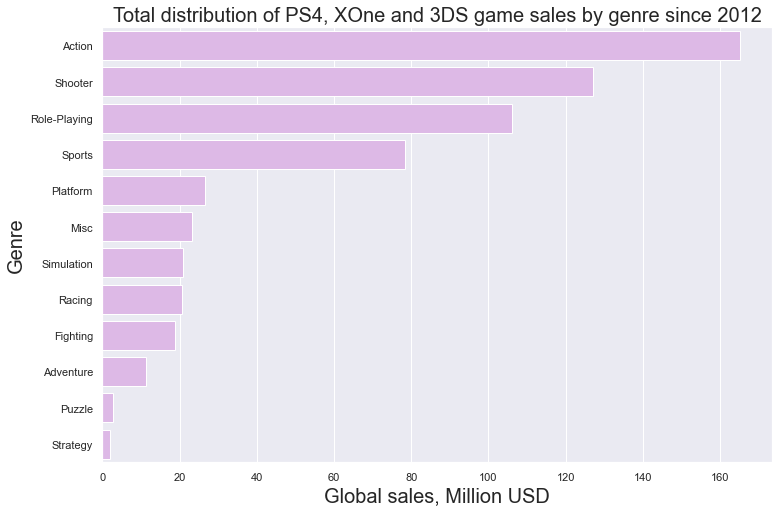

In [116]:
plt.figure(figsize=(12, 8))

# setting the parameters for plotting the graph
ax = sns.barplot(y=genres_sales_all.Genre,
                  x=genres_sales_all.Global_Sales,
                  orient='h',
                  color='#e2b2ed',
                  ci=None);

# axis labels and titles
plt.xlabel('Global sales, Million USD', fontsize=20)
plt.ylabel('Genre', fontsize=20)
plt.title('Total distribution of PS4, XOne and 3DS game sales by genre since 2012', fontsize=20);

**The most popular genres are Action, Shooter and Role-Playing. Fourth place is occupied by the Sports genre. Sales for other games differ significantly. Sales of games in the most unpopular genres (Puzzle and Strategy) differ tenfold compared to other genres.**

> Let's see the popularity of genres by platform.

In [117]:
# grouping by genres and platforms, sorting and selecting data
genres_sales = sales_3p.groupby(['Genre', 'Platform'], as_index=False).agg({'Global_Sales': 'sum'}).sort_values('Global_Sales', ascending=False)

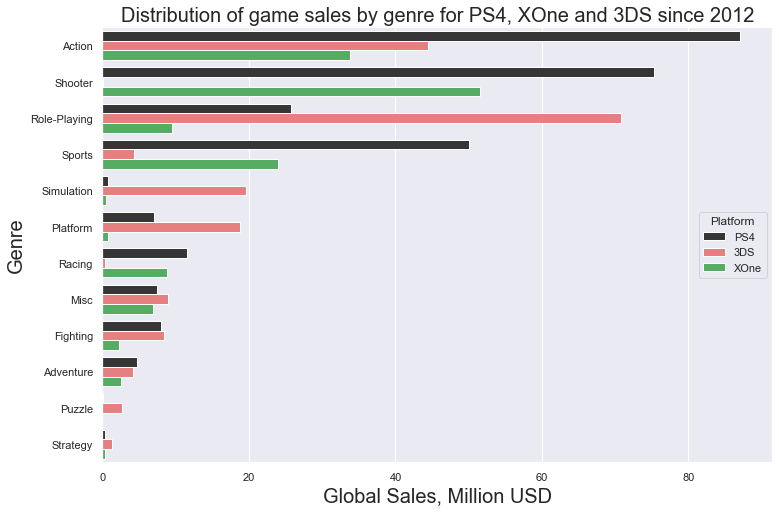

In [118]:
plt.figure(figsize=(12, 8))

# setting the parameters for plotting the graph
ax = sns.barplot(y=genres_sales.Genre,
                  x=genres_sales.Global_Sales,
                  orient='h',
                  color='#6925c2',
                  palette=['#363636', '#f76f6f', '#49ba5a'],
                  hue=genres_sales.Platform,
                  hue_order=['PS4', '3DS', 'XOne']
                  );

# axis labels and titles
plt.xlabel('Global Sales, Million USD', fontsize=20)
plt.ylabel('Genre', fontsize=20)
plt.title('Distribution of game sales by genre for PS4, XOne and 3DS since 2012', fontsize=20);

# Stage 4. User portrait of each region


> Let's determine for the user of each region the most popular platforms, the most popular genres, as well as the impact of the ESRB rating on sales by region.

> Let's take the most relevant data, making a sample for the last 5 years (starting from 2012)

In [122]:
# select data for the last five years
sales_4 = sales[sales['Year'] > 2011].reset_index(drop=True)

> Let's determine the popularity of platforms by region.

In [123]:
sales_4.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
1,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
3,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


In [124]:
# get the required data slice
sales_4_region = sales_4[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] \
     .groupby('Platform', as_index=False) \
     .agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum'}) \
     .melt(id_vars=['Platform']) \
     .sort_values('value', ascending=False)

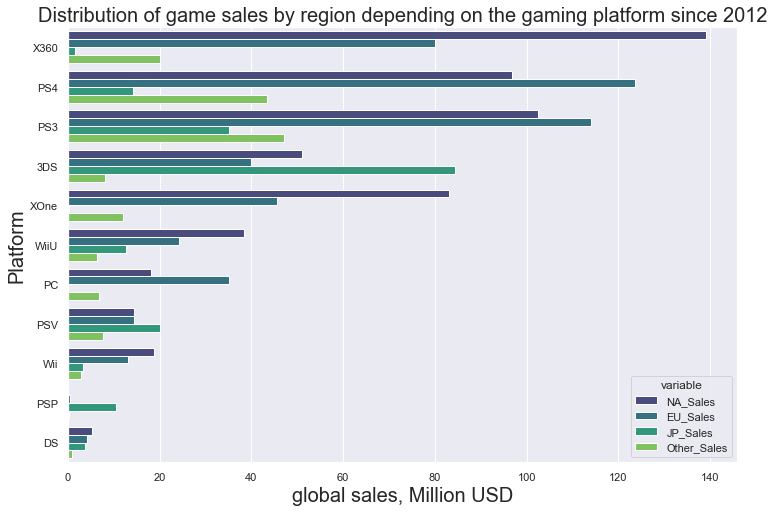

In [125]:
plt.figure(figsize=(12, 8))

# setting the parameters for plotting the graph
ax = sns.barplot(y=sales_4_region.Platform,
                  x=sales_4_region.value,
                  orient='h',
                  color='#6925c2',
                  palette='viridis',
                  hue=sales_4_region.variable);

# axis labels and titles
plt.xlabel('global sales, Million USD', fontsize=20)
plt.ylabel('Platform', fontsize=20)
plt.title('Distribution of game sales by region depending on the gaming platform since 2012', fontsize=20);

**The list of Top 5 platforms is as follows:**

1. X360
2. PS4
3. PS3
4. 3DS
5. XOne

> It should be noted that in the North America market the platforms of the manufacturer Microsoft and Sony, respectively (X360, PS4) are the most popular, while in Europe the most popular game consoles are Sony (PS4 and its successor PS3). In Japan, the most popular platform is the 3DS produced by the local company Nintendo.

> Let's define the most popular genres of games by region.

In [127]:
# get the required data slice
sales_4_genre = sales_4[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] \
     .groupby('Genre', as_index=False) \
     .agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales':'sum'}) \
     .melt(id_vars=['Genre']) \
     .sort_values('value', ascending=False)

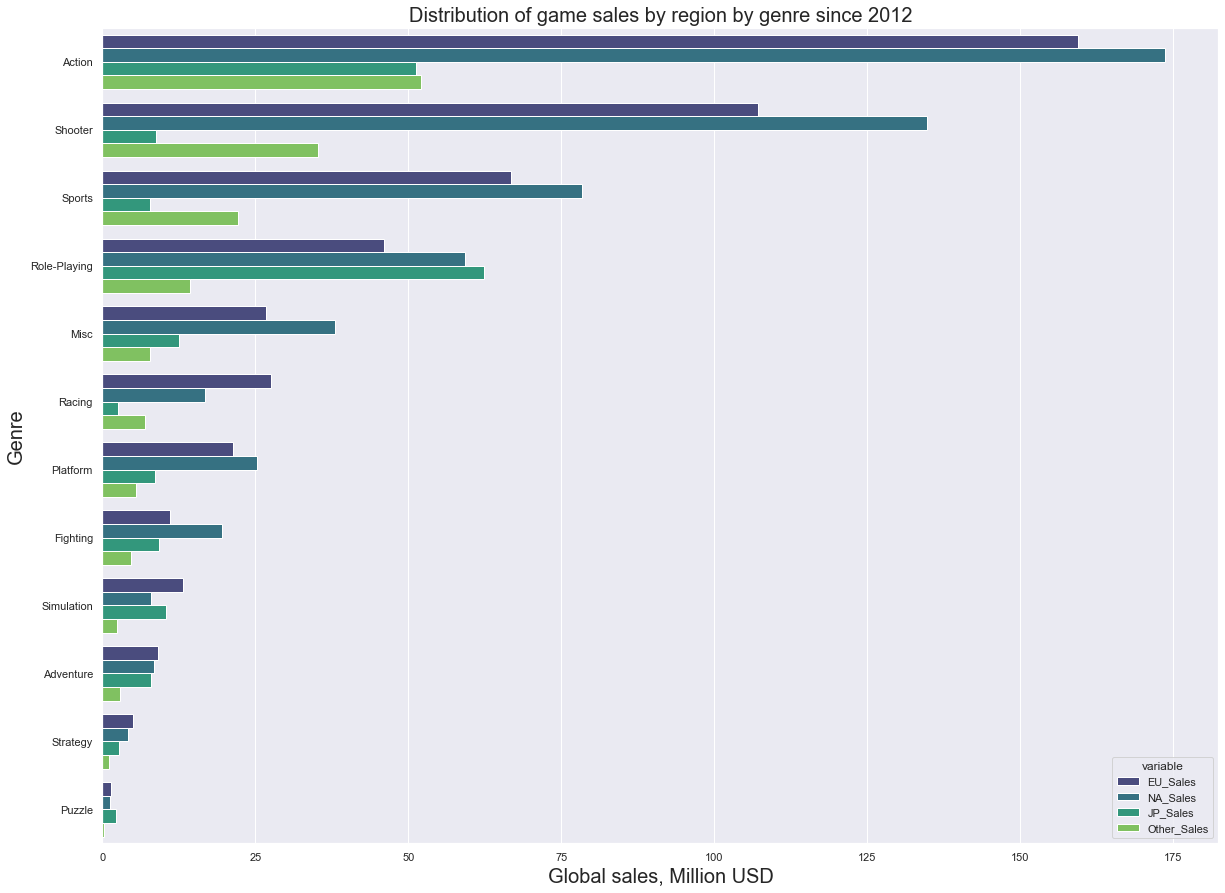

In [128]:
plt.figure(figsize=(20, 15))

# setting the parameters for plotting the graph
ax = sns.barplot(y=sales_4_genre.Genre,
                  x=sales_4_genre.value,
                  orient='h',
                  color='#6925c2',
                  palette='viridis',
                  hue=sales_4_genre.variable,
                  hue_order=['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']);

# axis labels and titles
plt.xlabel('Global sales, Million USD', fontsize=20)
plt.ylabel('Genre', fontsize=20)
plt.title('Distribution of game sales by region by genre since 2012', fontsize=20);

**List of Top 5 most popular genres:**

1. Action
2. Shooter
3. Sports
4. Role Playing
5. Misc


> **Note that in Japan, shooters are much less popular in comparison with Europe and North America. In the Japanese archipelago, the most popular genres are Role-Playing and Action. It is also worth noting that the total sales of games of all genres in North America and Europe are approximately comparable, while in the Asian market it is less than half.**

# Stage 5. Research results

## General conclusions

- Half of all video games were released between 2007 and 2016;
- The peak of global sales of released games was in 2008-2009. At the moment, the video game industry is in a recession; the life cycle of a video game platform is about 7-10 years;
- In the near future, platforms are promising: PS4, XOne and DS3;
- The most popular game genres over the past 5 years: Action, Shooter and Role-Playing;
- Most of the total revenue is generated by a small number of hit games, the sales of which are dozens of times higher than the sales of other games;

- The user profile of the North American and European regions does not differ much in preferences, while Asian consumers stand out both in their choice of platform and in their favorite genre. Therefore, it is worth considering the historical and cultural differences of the regions, which are reflected directly in the preferences of users when doing business;


## General recommendations

- Bet on the sale of games for the PS4, XOne and DS3 platforms;
- Give preference to games of the Action, Shooter and Role-Playing genres;
- Take into account the specifics of the Asian market when launching advertising campaigns;


> - **In the long term, think about business diversification and / or other sources of revenue.**

It is interesting to note that the 3DS platform stands out in terms of genre preferences. For example, the Shooter genre is not at all popular on it, while Role-Playing takes first place by a wide margin. Genre Sports (4th place in the overall ranking) is the most popular among PS4 users.

## Conclusions

- At this stage, an exploratory analysis of the data was carried out. The number of games released in different periods is certain (half of the games presented were released from 2007 to 2016).

- The average life cycle of the popularity of gaming platforms (about 6 years) is noted.

- The three most relevant platforms at the moment and in terms of perspectives for the next few years (PS3, XOne, 3DS) have been identified. 

- The most popular game genres over the past 5 years (Action, Shooter and Role-Playing) have been found. A breakdown of the popularity of genres by platform was obtained 

- It was also noted that a small number of hit games generates most of the total revenue. Sales of which are dozens of times higher than the sales of the average by the standards of the total world sales of games.

- EA Games is notably the most popular publisher with Action games contributing to most their revenue. 

- The North American market covers a larger portion of sales revenues and games release followed by the European market. 